In [3]:
import warnings
warnings.filterwarnings("ignore")

Import semua library

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

import matplotlib.font_manager as fm

available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(available_fonts)  # Ini akan mencetak semua font yang bisa digunakan


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'Liberation Serif', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STI

Import dataset

In [5]:
Root_dir = '/content/drive/MyDrive/Pengenalan pola/archive'

In [6]:
Crema_path = Root_dir + "/Crema/"
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

In [7]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

1- Data preprocessing

In [8]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1079_IWW_HAP_XX.wav',
 '1079_MTI_SAD_XX.wav',
 '1079_TIE_ANG_XX.wav',
 '1079_TSI_HAP_XX.wav',
 '1079_MTI_ANG_XX.wav',
 '1079_TAI_HAP_XX.wav',
 '1079_MTI_NEU_XX.wav',
 '1079_MTI_FEA_XX.wav',
 '1080_IEO_DIS_HI.wav',
 '1080_IEO_DIS_LO.wav',
 '1080_DFA_FEA_XX.wav',
 '1079_WSI_HAP_XX.wav',
 '1080_IEO_ANG_MD.wav',
 '1080_DFA_SAD_XX.wav',
 '1080_IEO_FEA_HI.wav']

In [9]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')

# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})


(7442, 2)


In [10]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['happy', 'sad', 'angry', 'neutral', 'fear', 'disgust'],
 ['happy', 'sad', 'angry', 'neutral', 'fear', 'disgust']]

In [11]:
font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

2- Plot Detail dari Setiap Dataset

Kita dapat melihat jumlah sampel di setiap kelas. Selain itu, kita juga dapat mempertimbangkan keseimbangan dalam dataset.

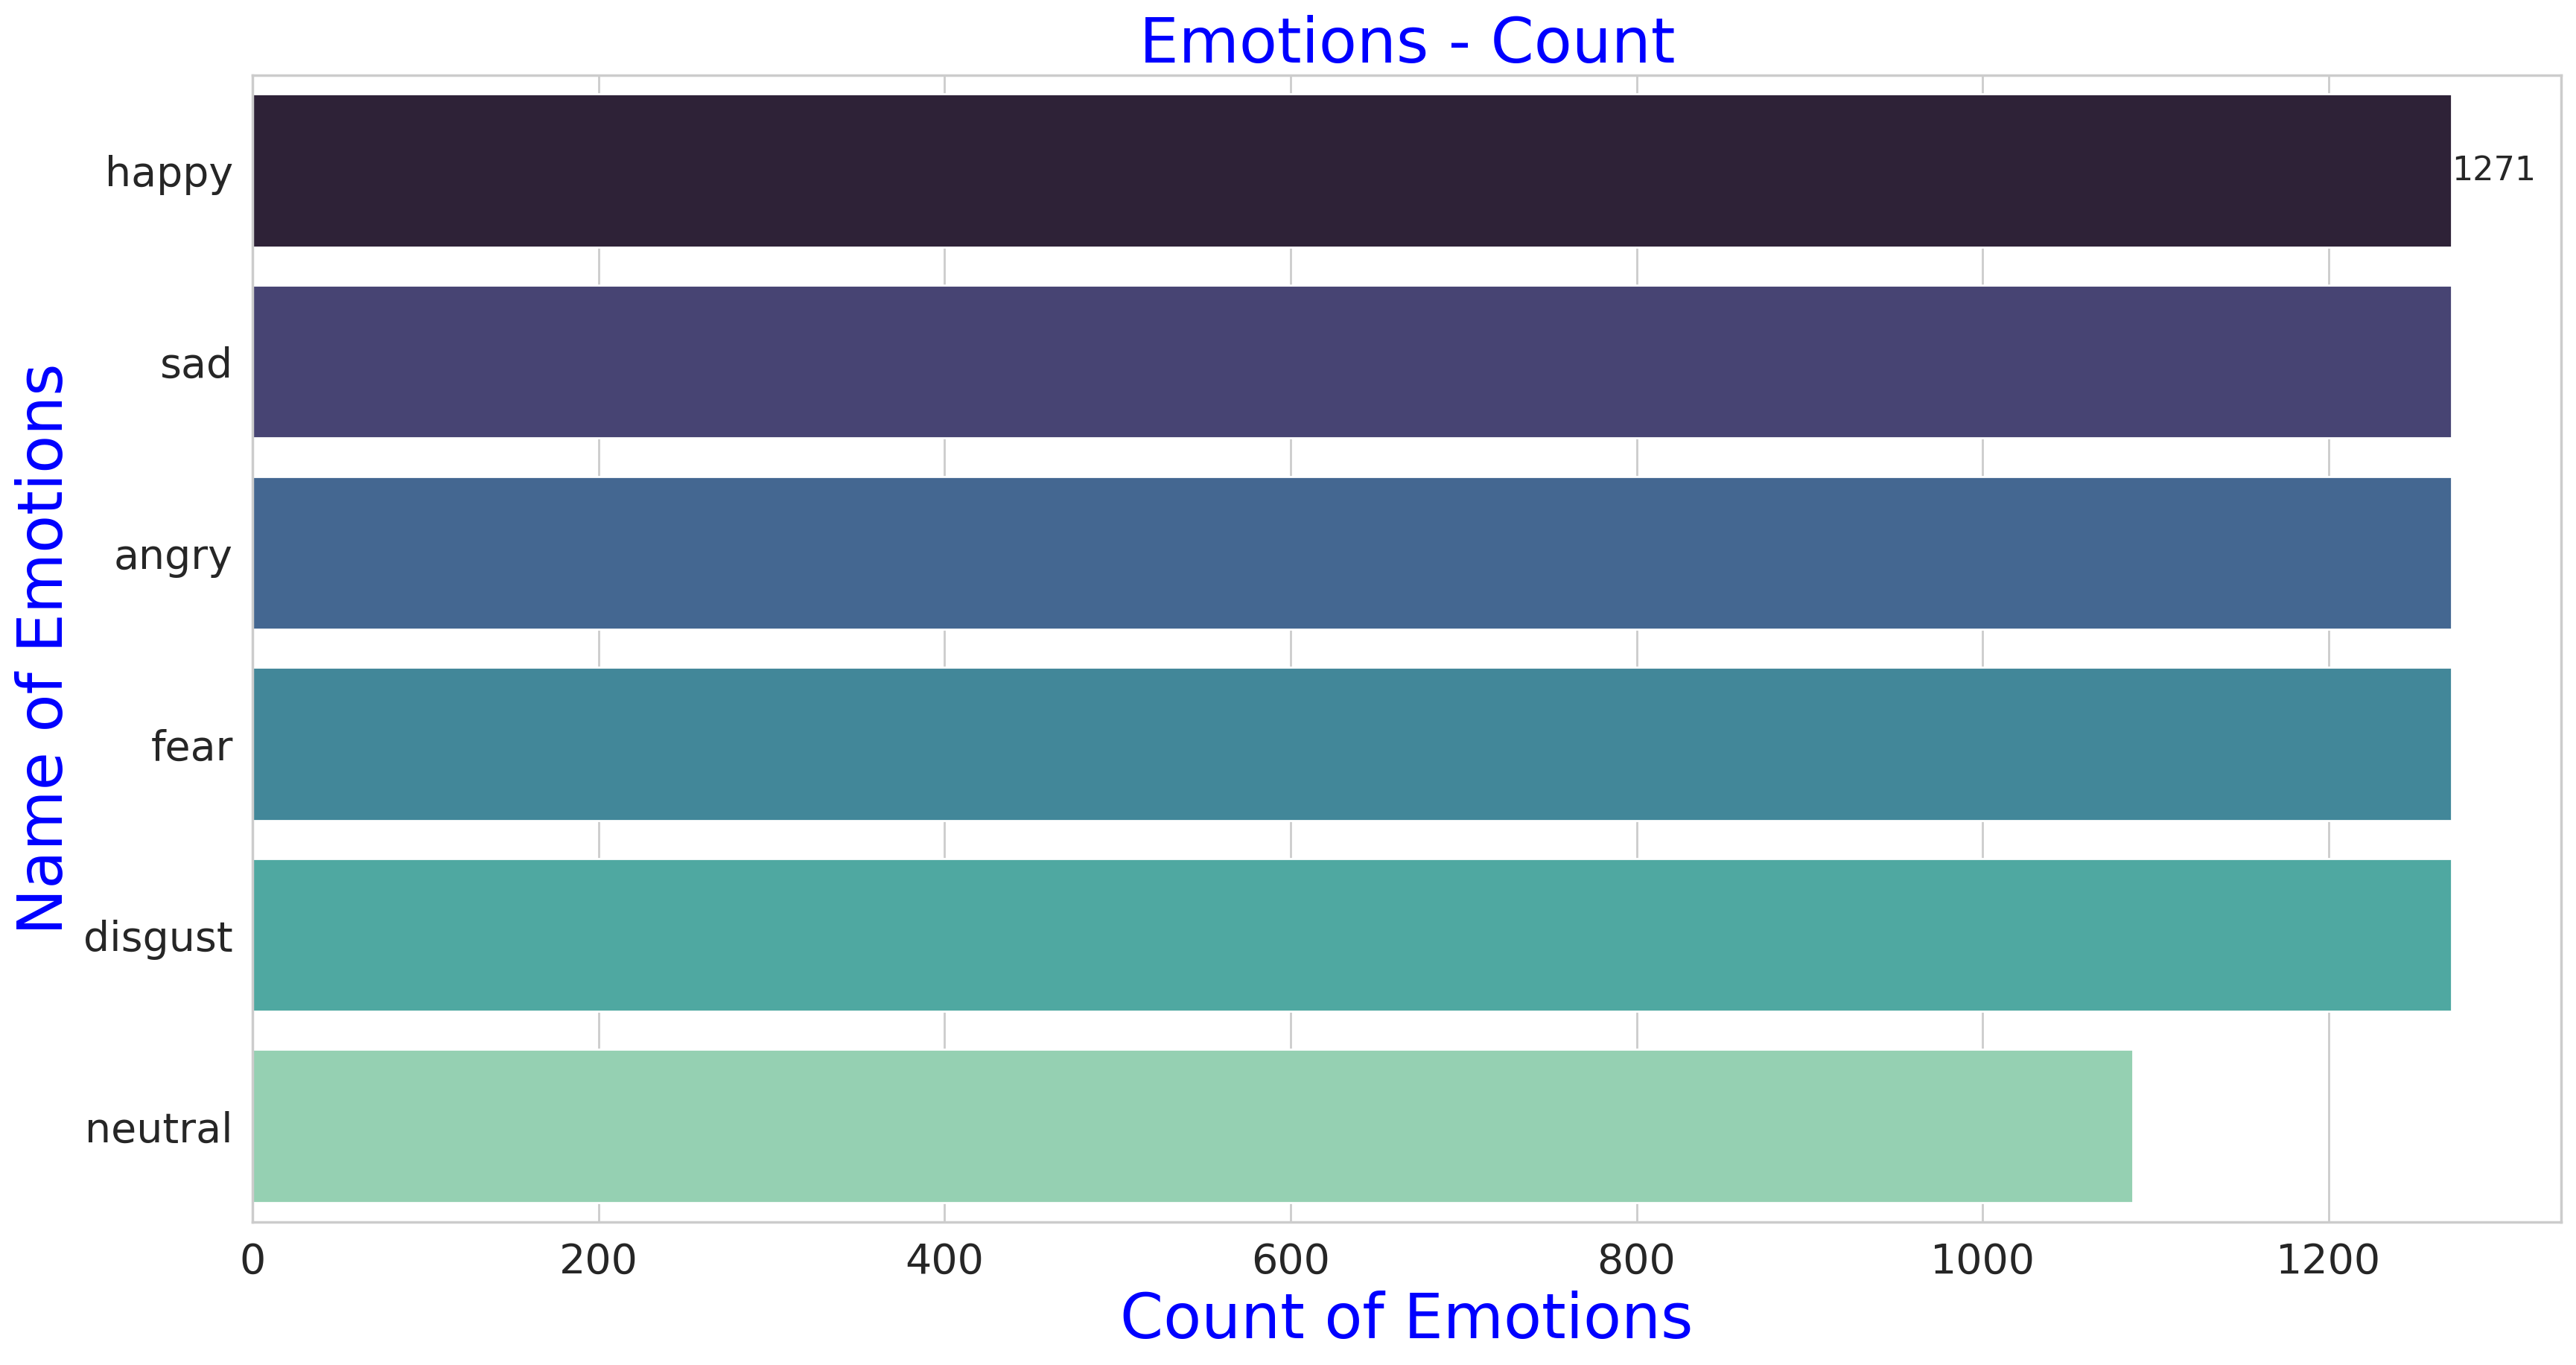

In [12]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

Ravdess

In [13]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_24',
 'Actor_22',
 'Actor_21',
 'Actor_23',
 'Actor_20',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_15',
 'Actor_16',
 'Actor_07',
 'Actor_05',
 'Actor_09',
 'Actor_06',
 'Actor_08']

Itu tidak cukup

In [14]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(Ravdess_path + it + '/' + file)


emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [15]:
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['calm', 'neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
 ['calm', 'neutral', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']]

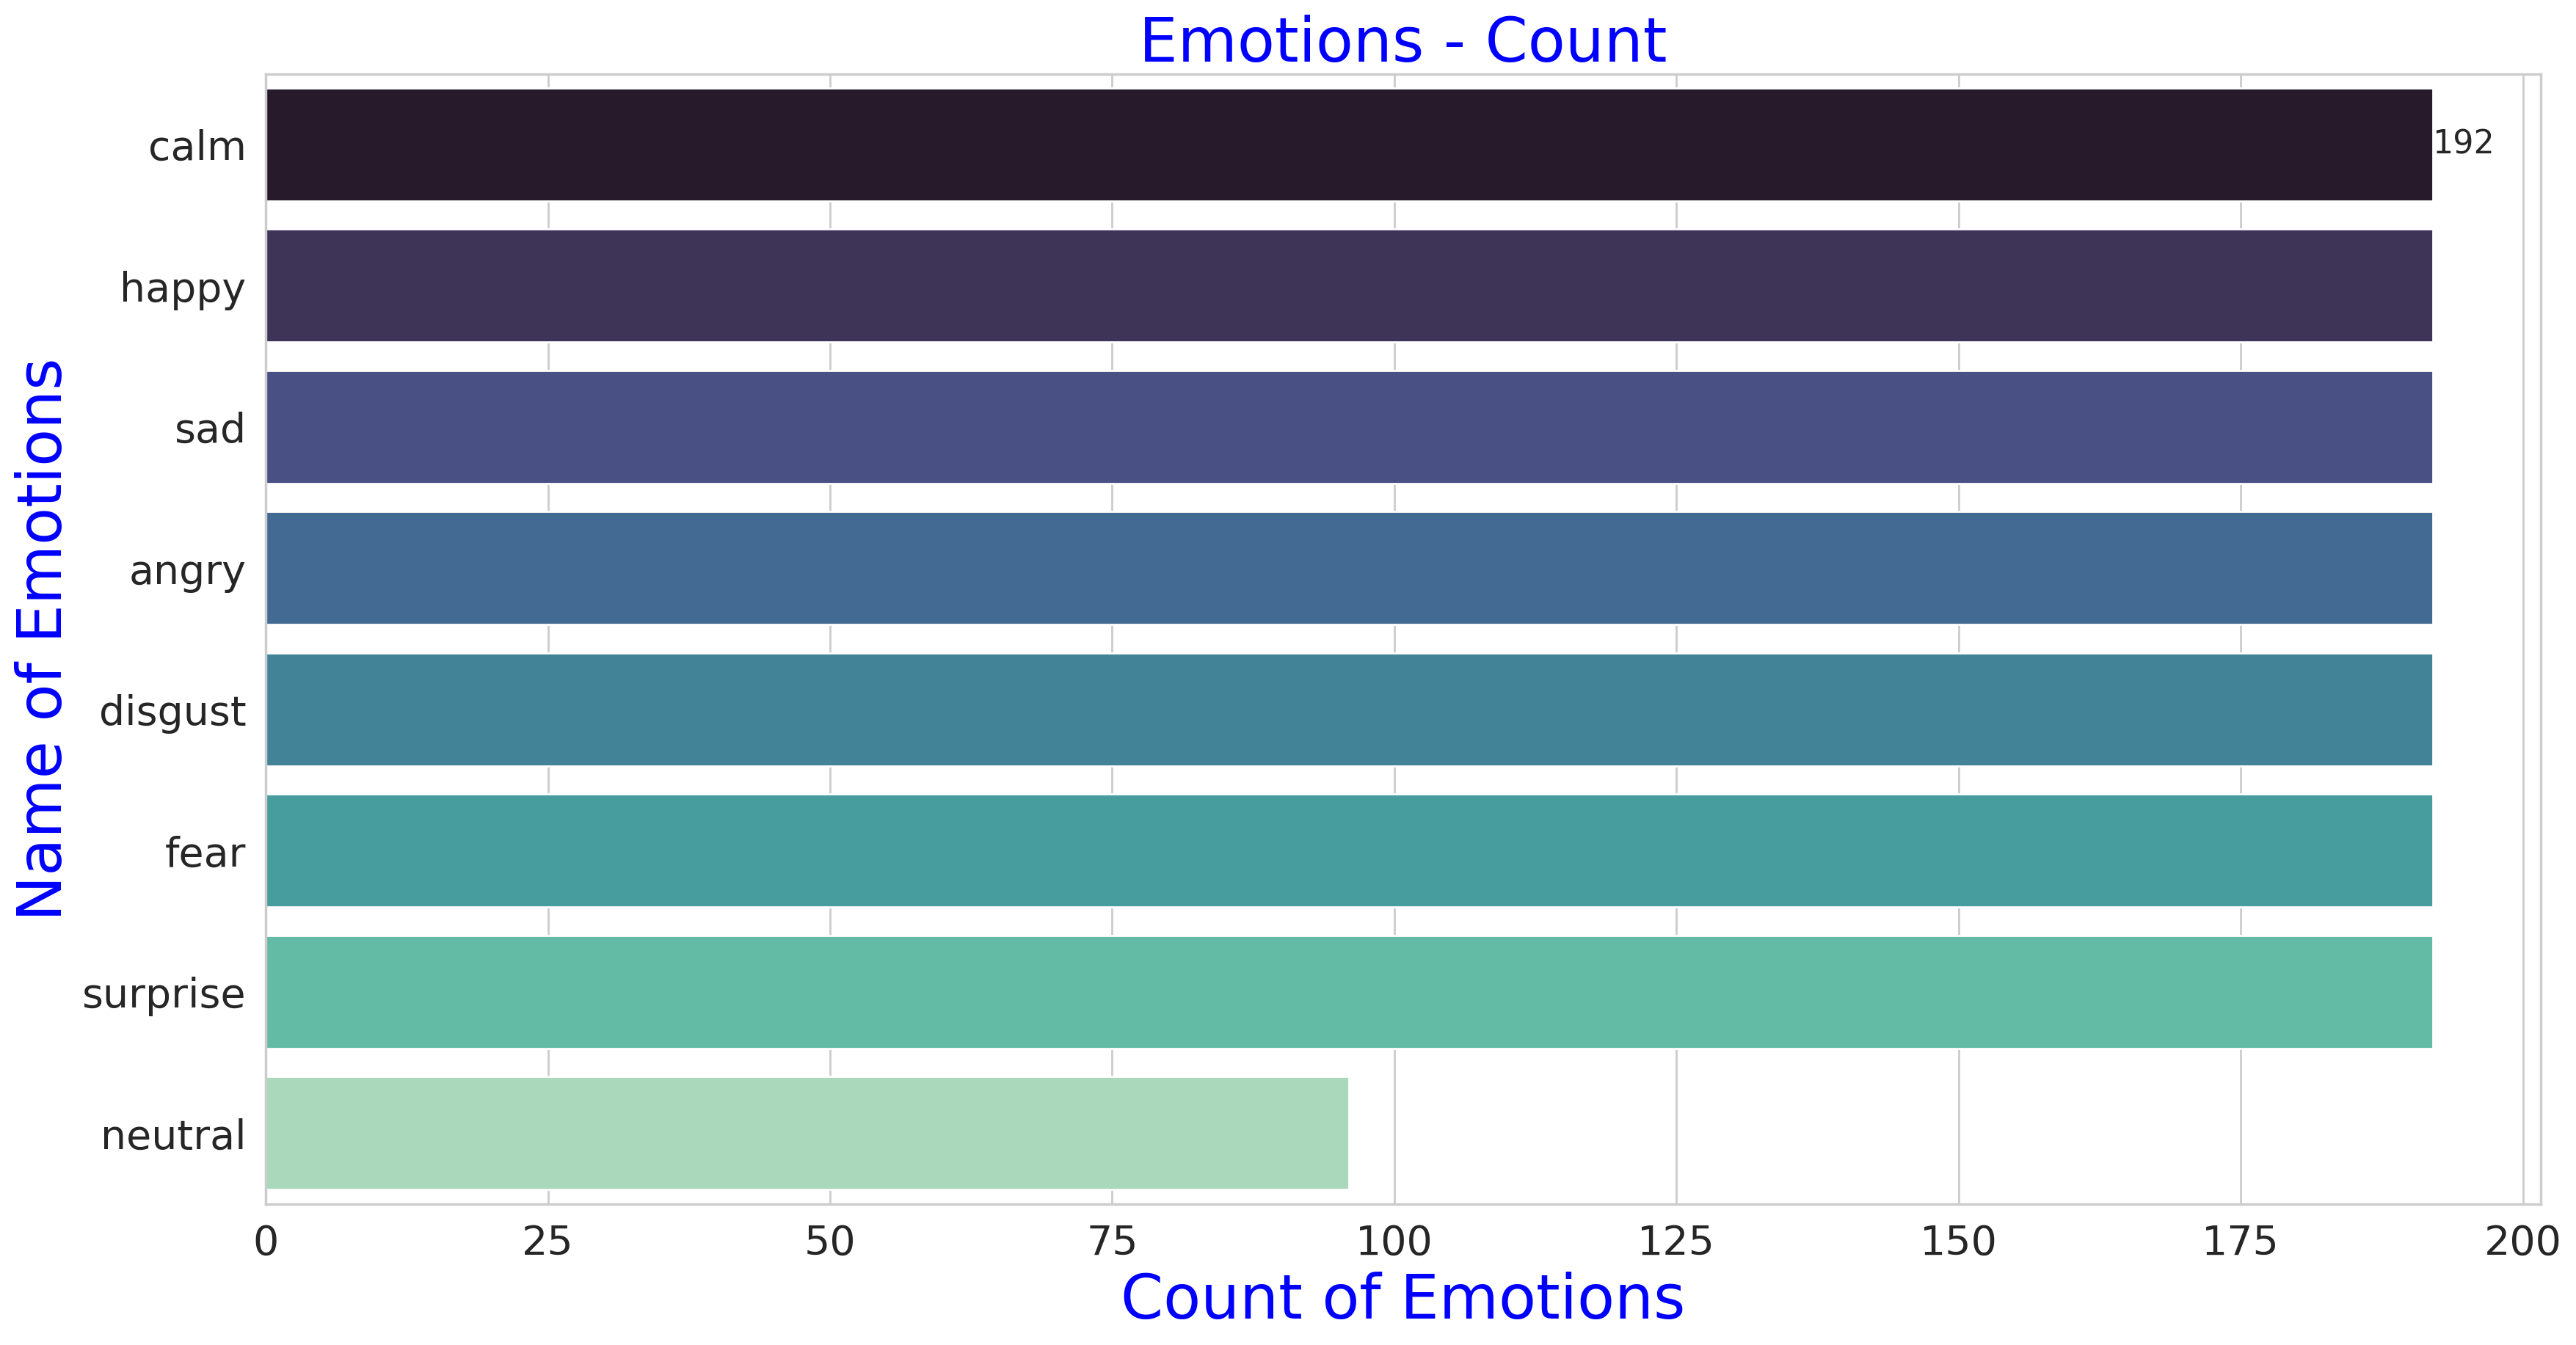

In [16]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

Savee

In [17]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

['DC_a01.wav',
 'DC_a03.wav',
 'DC_a09.wav',
 'DC_d02.wav',
 'DC_a05.wav',
 'DC_d07.wav',
 'DC_d09.wav',
 'DC_d08.wav',
 'DC_d04.wav',
 'DC_a08.wav',
 'DC_d01.wav',
 'DC_a13.wav',
 'DC_a12.wav',
 'DC_a14.wav',
 'DC_d06.wav']

In [18]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')

    else:
        emotions_savee.append('Unknown')

# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
Savee_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [19]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'],
 ['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']]

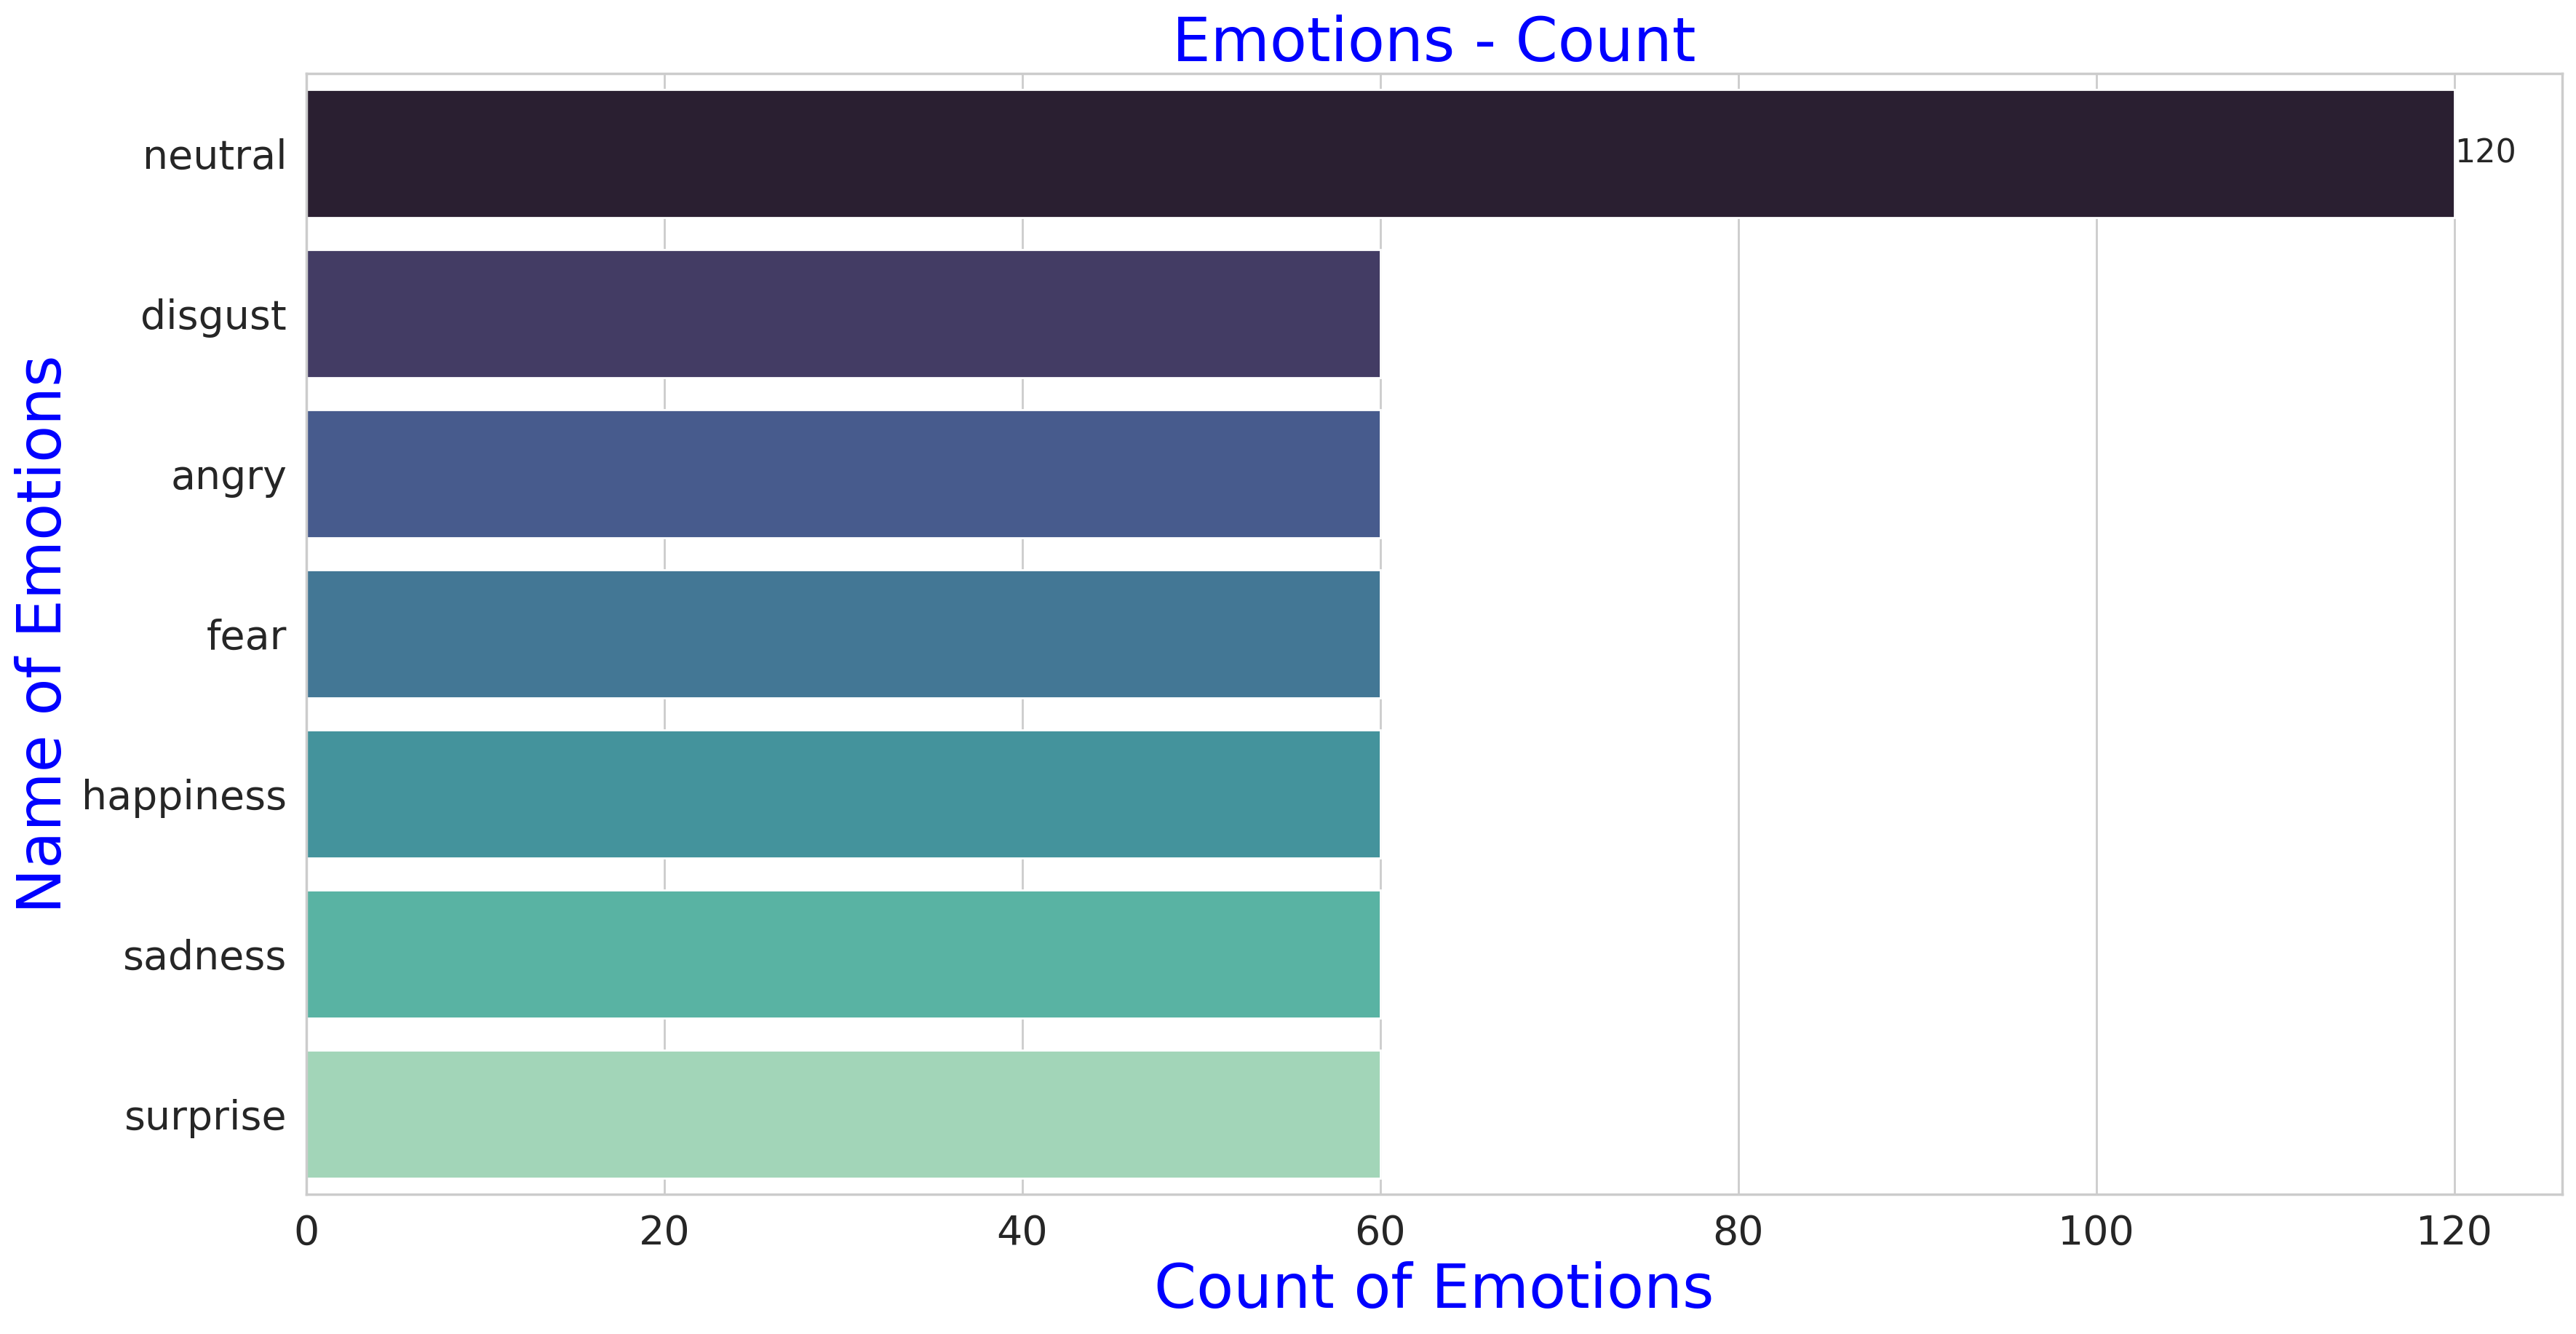

In [20]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [21]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['OAF_Pleasant_surprise',
 'YAF_sad',
 'YAF_angry',
 'YAF_happy',
 'YAF_fear',
 'YAF_neutral',
 'OAF_Sad',
 'YAF_pleasant_surprised',
 'OAF_neutral',
 'YAF_disgust',
 'OAF_disgust',
 'OAF_angry',
 'OAF_happy',
 'OAF_Fear']

Tess

In [22]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(Tess_path + it + '/' + file)



# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [23]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['surprise', 'sad', 'angry', 'happy', 'fear', 'neutral', 'disgust'],
 ['surprise', 'sad', 'angry', 'happy', 'fear', 'neutral', 'disgust']]

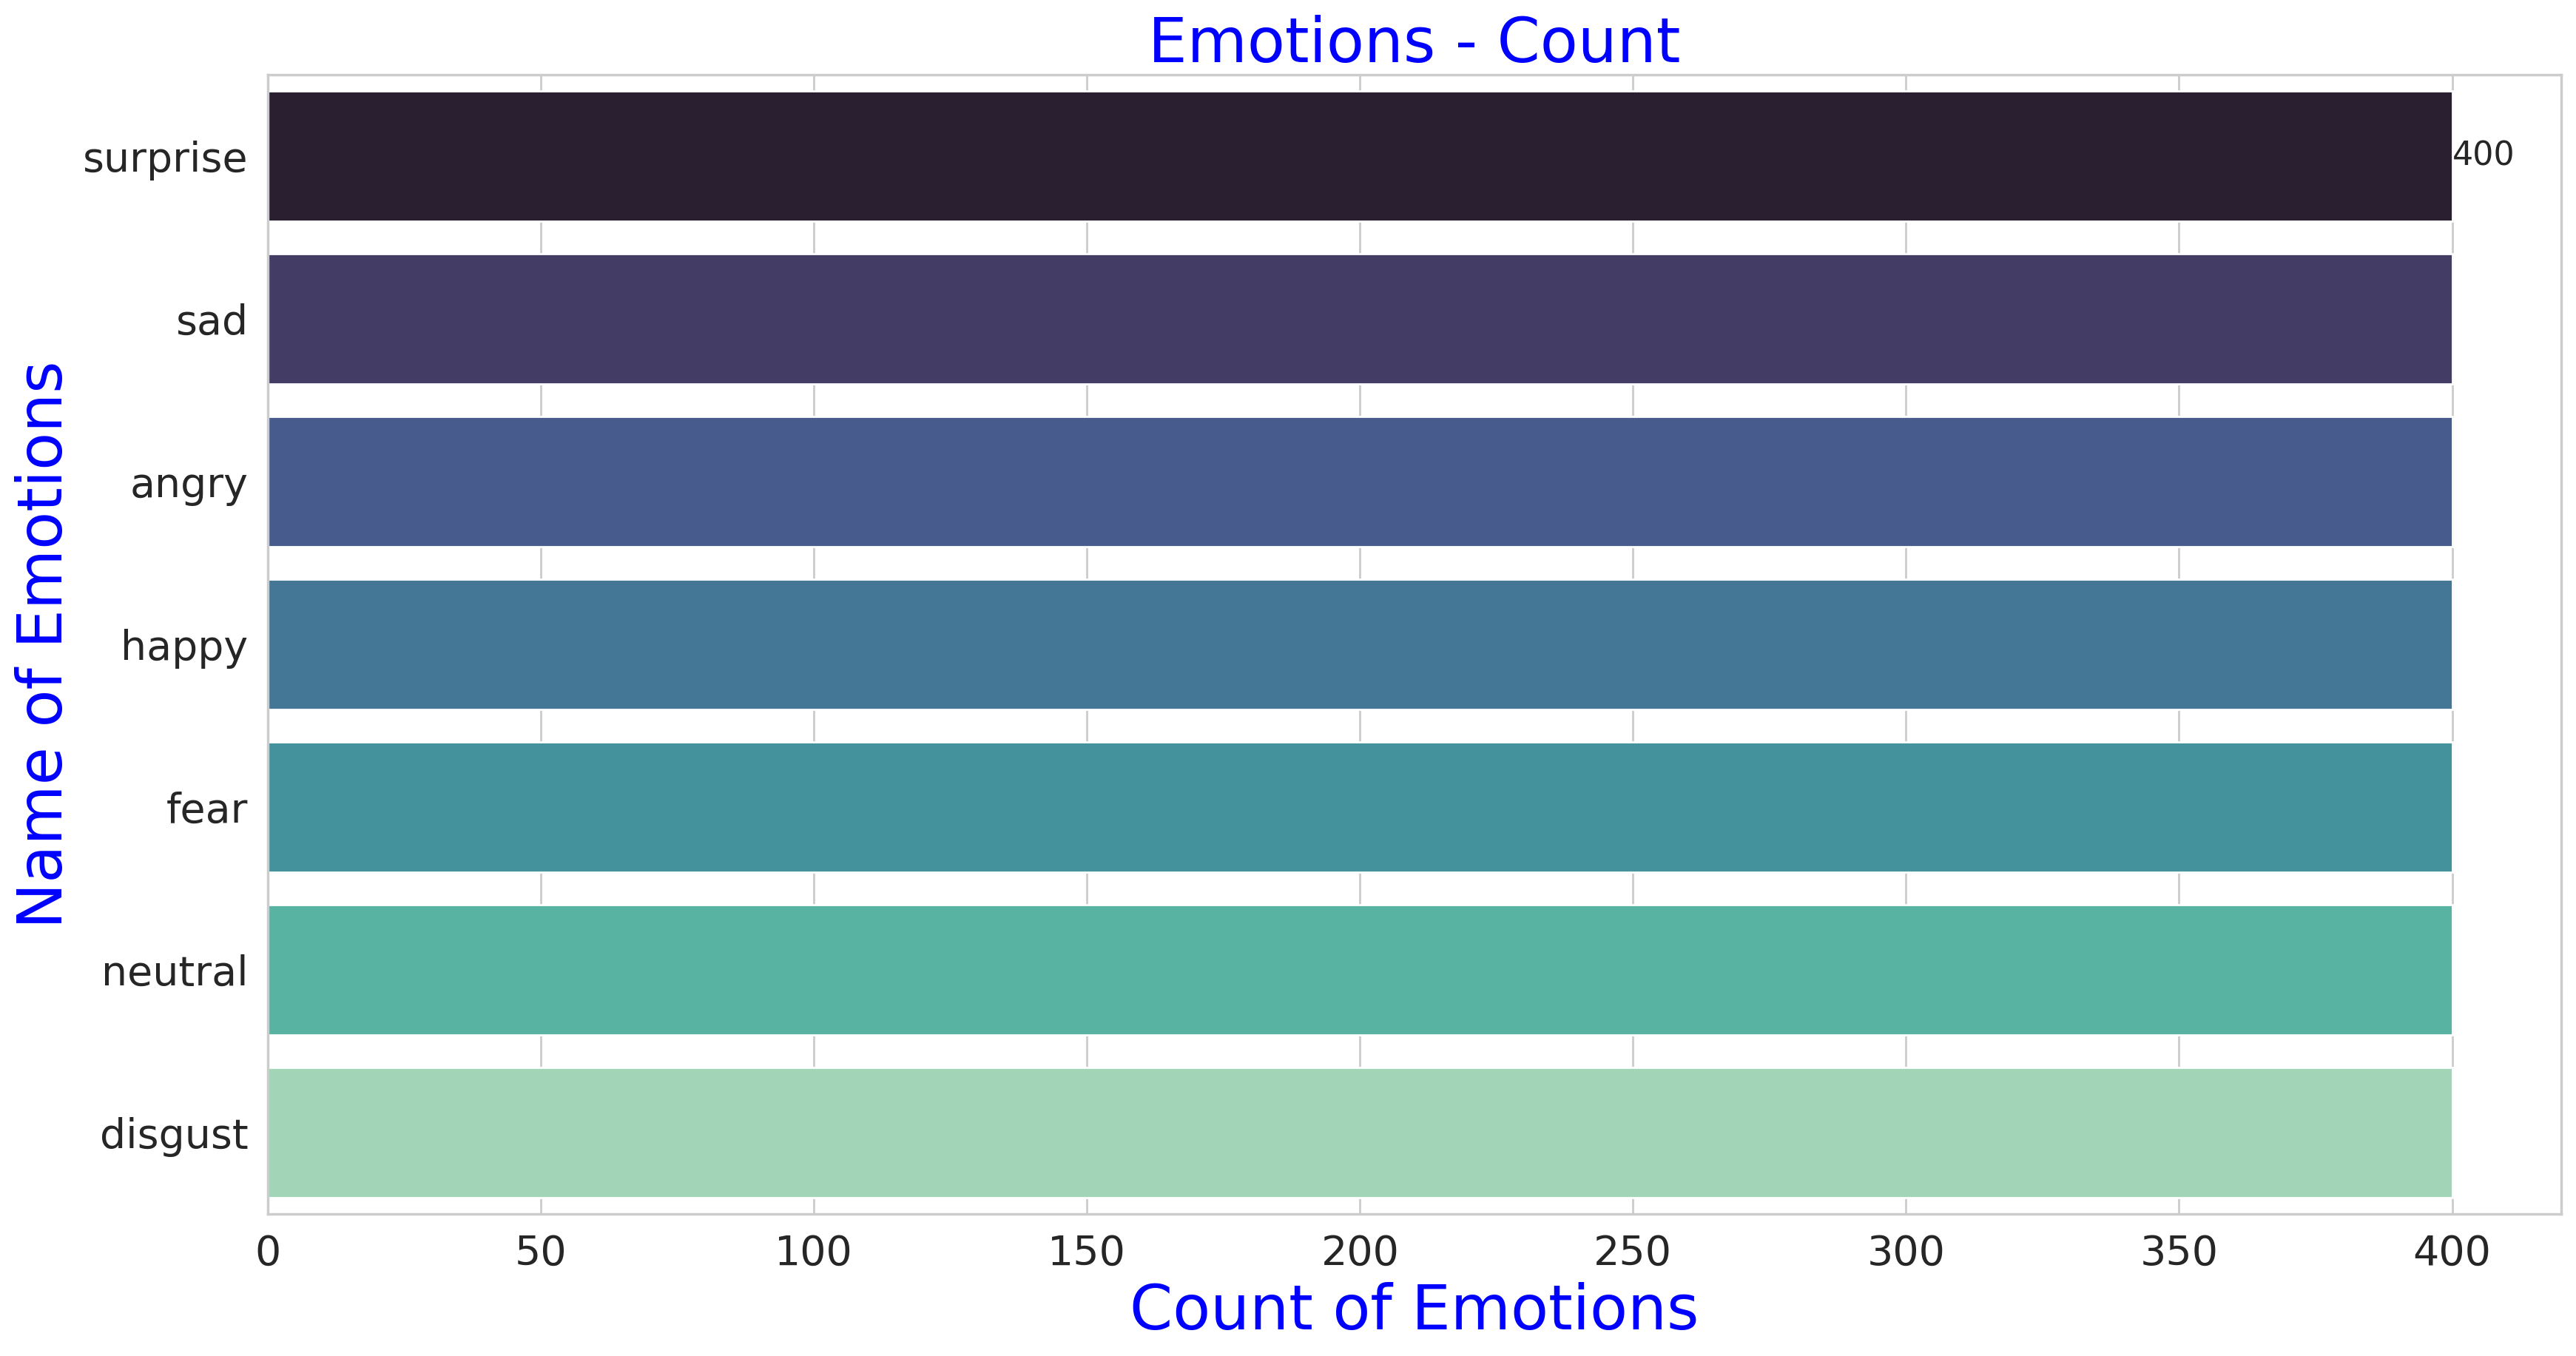

In [24]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

3- Plot Detail dari Setiap Dataset

Sekarang saatnya menghubungkan semua dataset satu sama lain jika kita ingin menggunakannya dalam satu model. Namun, saya hanya ingin menggunakan Crema saja.

In [25]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

In [26]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['happy',
  'sad',
  'angry',
  'neutral',
  'fear',
  'disgust',
  'calm',
  'surprise',
  'happiness',
  'sadness'],
 ['happy',
  'sad',
  'angry',
  'neutral',
  'fear',
  'disgust',
  'calm',
  'surprise',
  'happiness',
  'sadness']]

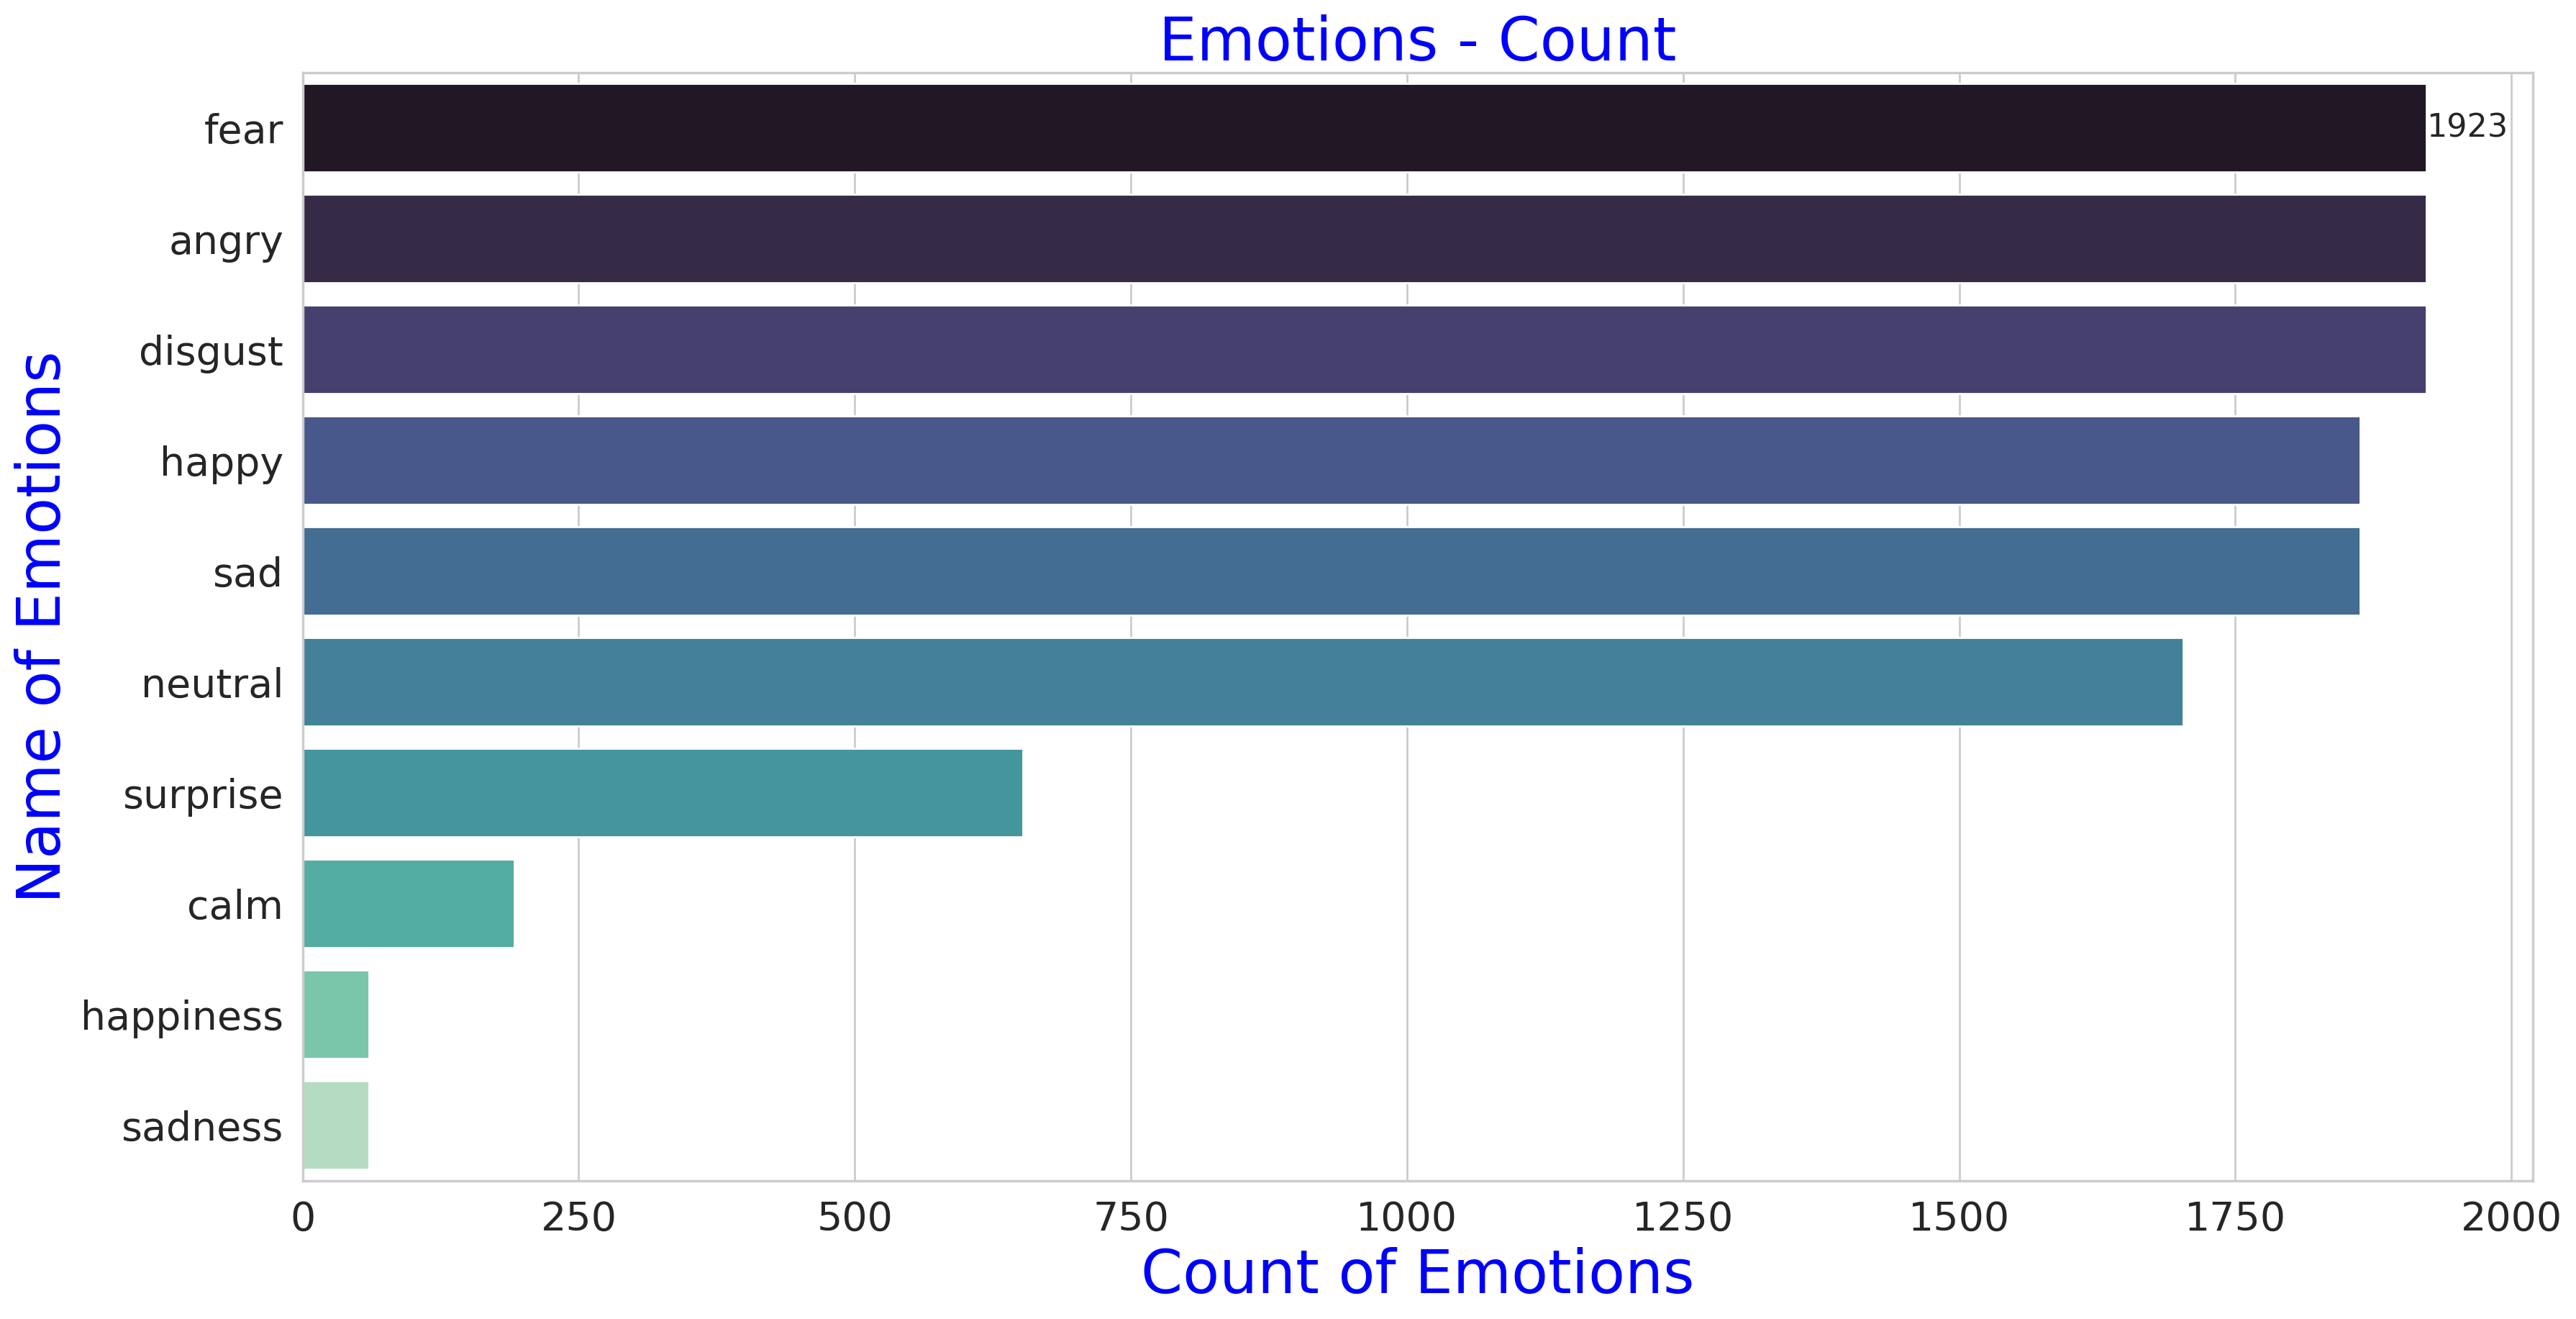

In [27]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

Bagaimana jika kita mengganti "Happiness" menjadi "Happy", "Sadness" menjadi "Sad", dan "Calm" menjadi "Neutral". Saya tahu bahwa ada beberapa perbedaan makna antara "Calm" dan "Neutral", tetapi untuk menghindari ketidakseimbangan dalam sampel, kita bisa mengganti "Calm" menjadi "Neutral".

Sebagai kata sifat, perbedaan antara "Calm" dan "Neutral" adalah bahwa "Calm" berarti damai, tenang, terutama bebas dari kemarahan dan kecemasan, sedangkan "Neutral" berarti tidak memihak dalam suatu konflik seperti perang; tidak bersekutu. Sebagai kata benda, perbedaan antara "Calm" dan "Neutral" adalah bahwa "Calm" mengacu pada keadaan tenang; ketenteraman; ketiadaan kekhawatiran, kemarahan, ketakutan, atau emosi negatif lainnya, sedangkan "Neutral" mengacu pada keadaan tidak memihak atau anggota dari suatu pihak yang netral.

In [28]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [29]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

[['happy', 'sad', 'angry', 'neutral', 'fear', 'disgust', 'surprise'],
 ['happy', 'sad', 'angry', 'neutral', 'fear', 'disgust', 'surprise']]

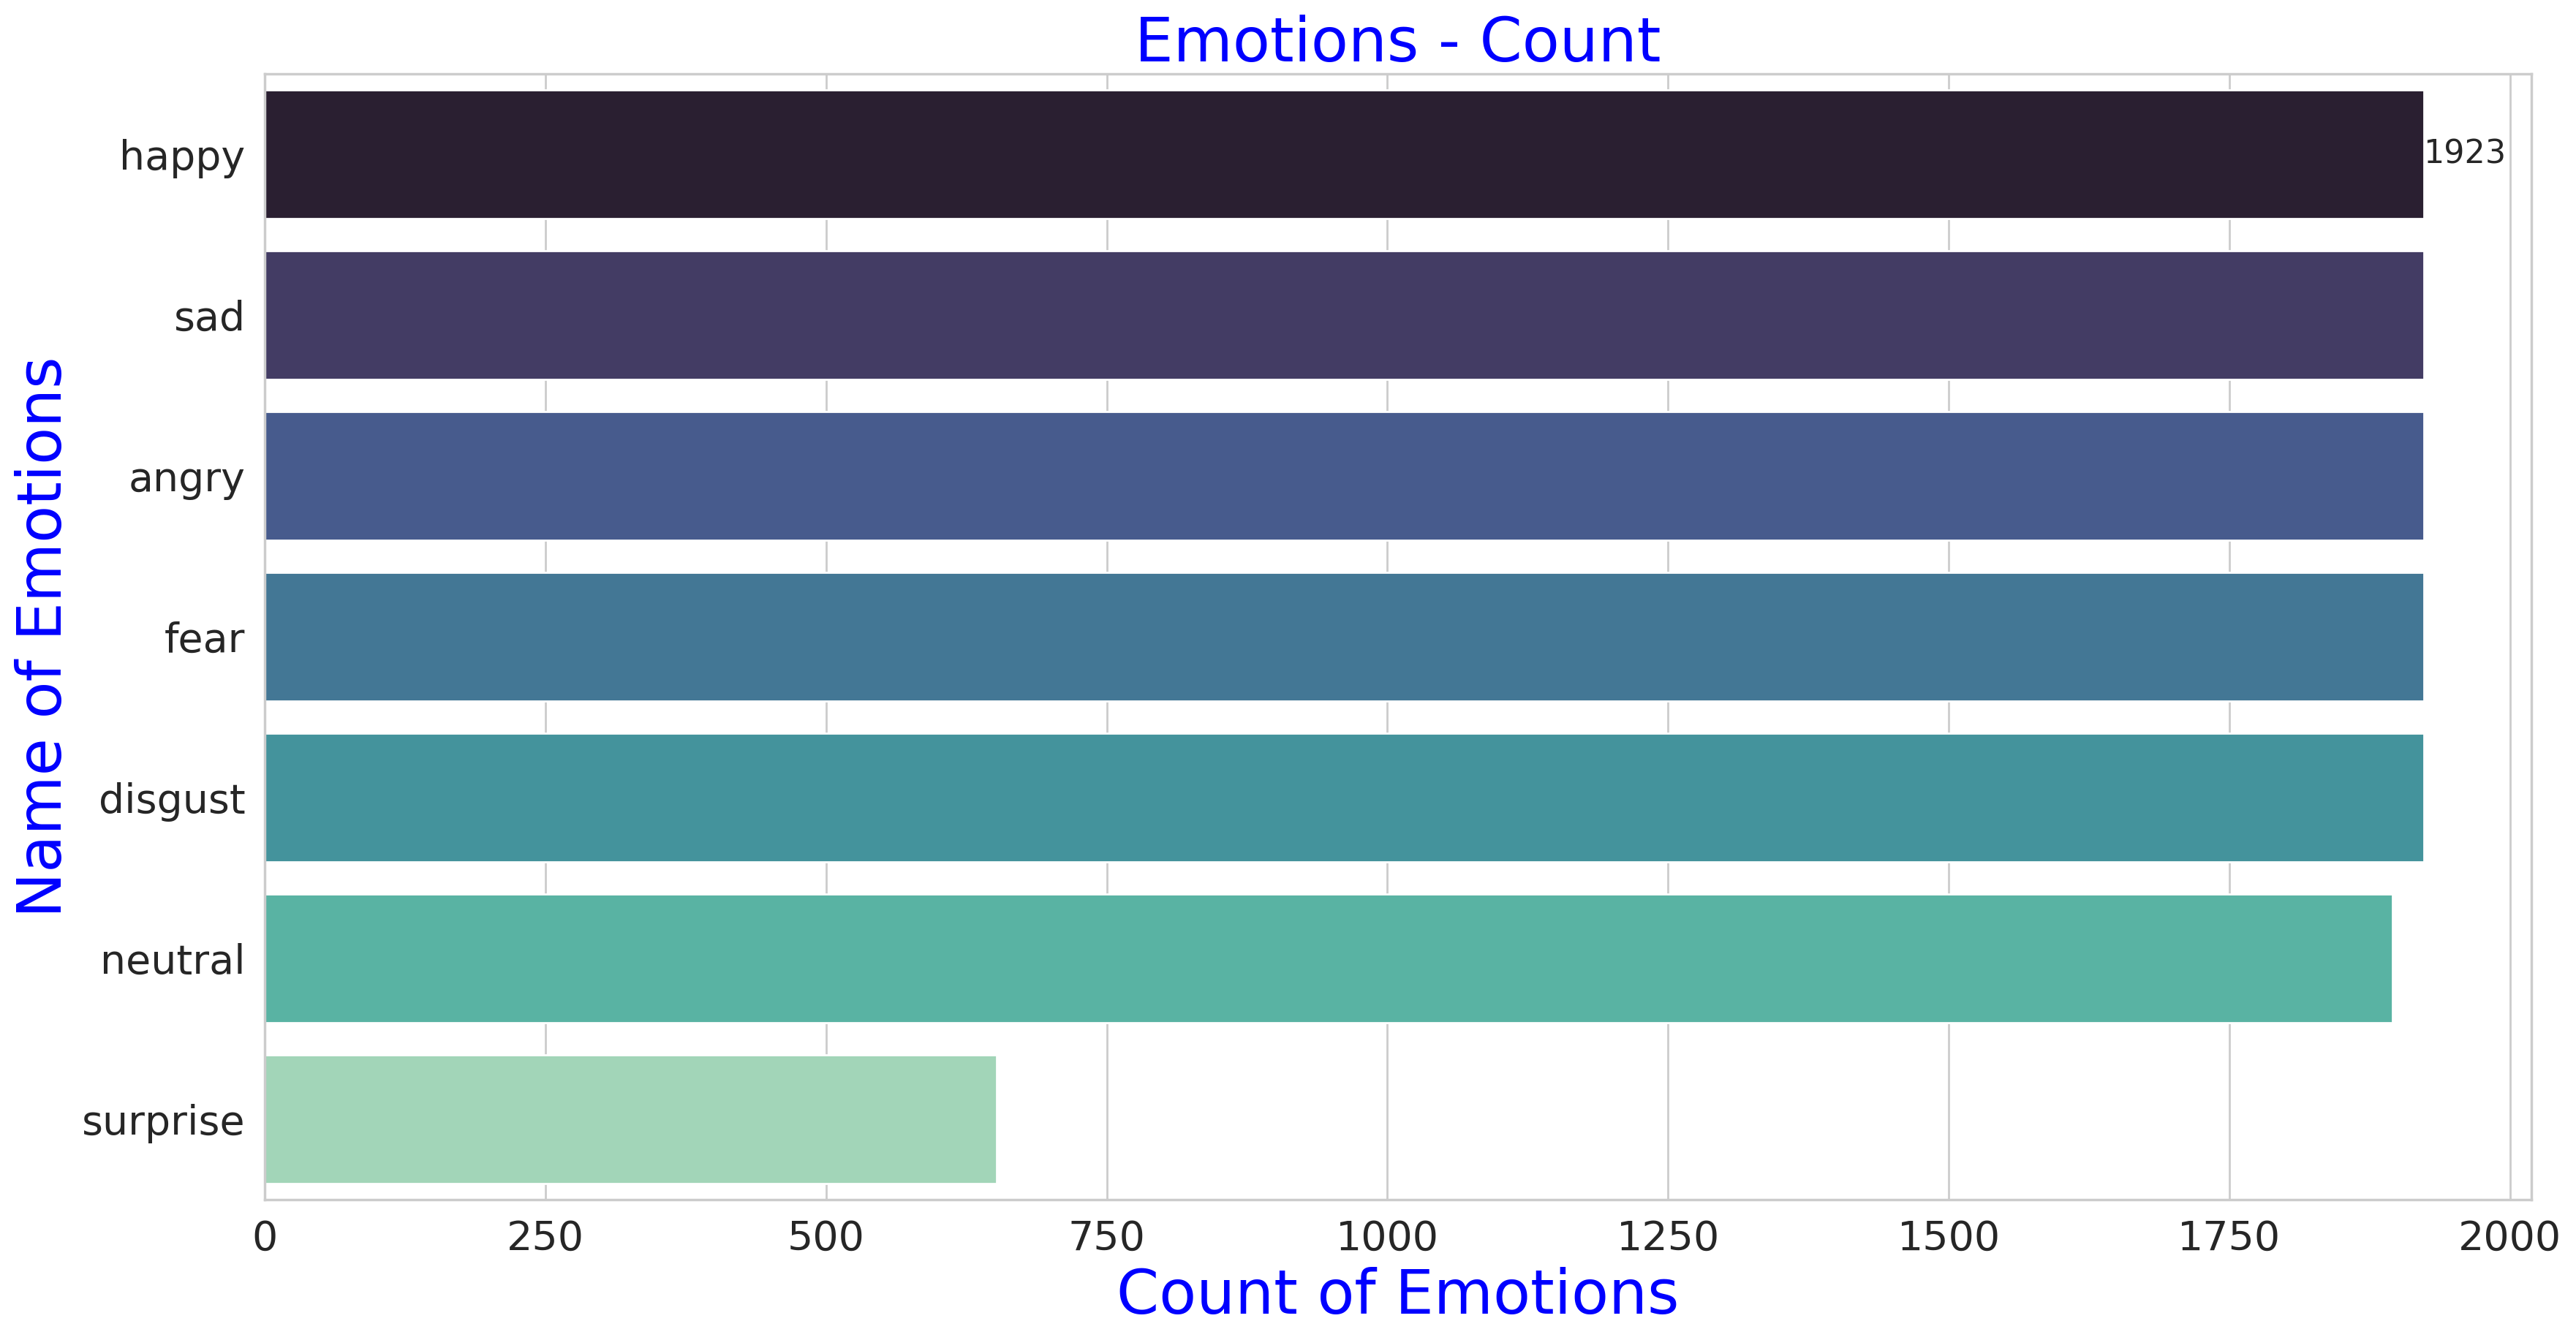

In [30]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

### **Waveplot**  

Gelombang suara adalah representasi penting dari sinyal ucapan, menangkap variasi tekanan yang merambat melalui udara. Namun, ketika menganalisis ucapan, kita sering kali perlu berfokus pada segmen atau fonem tertentu dalam sinyal. Di sinilah Short-Time Fourier Transform (STFT) menjadi sangat berguna.  

### **Kuantisasi: Konversi Audio ke Digital**  

Proses konversi dari analog ke digital disebut kuantisasi, dan ini sangat mirip dengan cara kamera menangkap video. Kamera video merekonstruksi momen kontinu dalam waktu dengan menangkap ribuan gambar berurutan per detik, yang disebut frame. Semakin tinggi frame rate, semakin halus pergerakan dalam video.  

Dalam audio digital, konverter analog-ke-digital (ADC) menangkap ribuan sampel audio per detik dengan laju sampel dan kedalaman bit tertentu untuk merekonstruksi sinyal aslinya. Semakin tinggi laju sampel dan kedalaman bit, semakin tinggi resolusi audio yang dihasilkan.  

Laju sampel (sample rate) adalah jumlah sampel per detik yang diambil dari gelombang suara untuk menghasilkan sinyal digital yang terpisah. Semakin tinggi laju sampel, semakin banyak cuplikan sinyal audio yang ditangkap. Laju sampel audio diukur dalam kilohertz (kHz) dan menentukan rentang frekuensi yang dapat ditangkap dalam audio digital.  

Di sebagian besar DAW (Digital Audio Workstation), Anda akan menemukan opsi yang memungkinkan penyesuaian laju sampel dalam preferensi audio proyek Anda. Ini mengontrol laju sampel untuk semua audio dalam proyek tersebut.  

Jika Anda merekam musik, laju sampel standar yang umum digunakan adalah **44,1 kHz** atau 44.100 sampel per detik. Ini adalah standar untuk sebagian besar audio konsumen, termasuk format seperti CD. Sementara itu, **48 kHz** adalah laju sampel umum lainnya yang sering digunakan dalam produksi film.  

Semakin tinggi laju sampel, semakin banyak pengukuran per detik yang diambil, sehingga semakin mendekati rekonstruksi audio aslinya. Oleh karena itu, 48 kHz sering digunakan dalam audio untuk video yang biasanya membutuhkan rentang dinamis yang lebih luas.  

In [34]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)

Sum_df_rep['Arrays'] = audio_arrays

CPU times: user 1min 2s, sys: 5.92 s, total: 1min 8s
Wall time: 9min 30s


In [32]:
Sum_df_rep.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

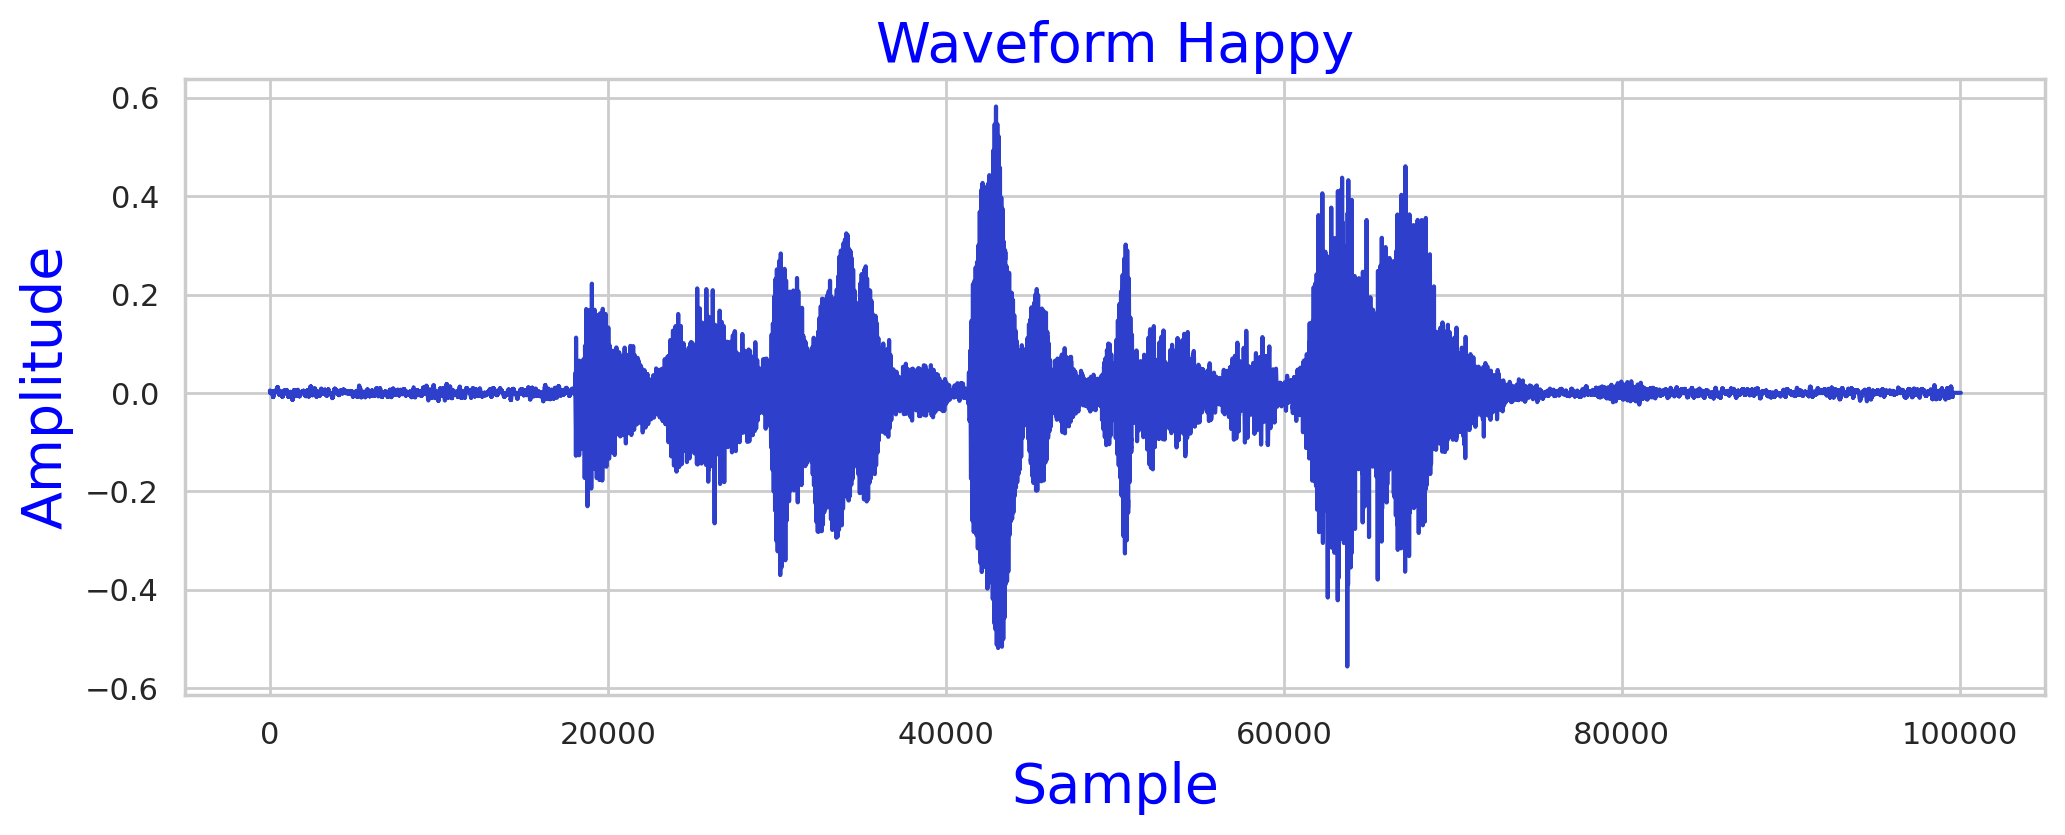

In [36]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Happy', fontdict= font2)
plt.show()

Audio(happy_sp.iloc[0])

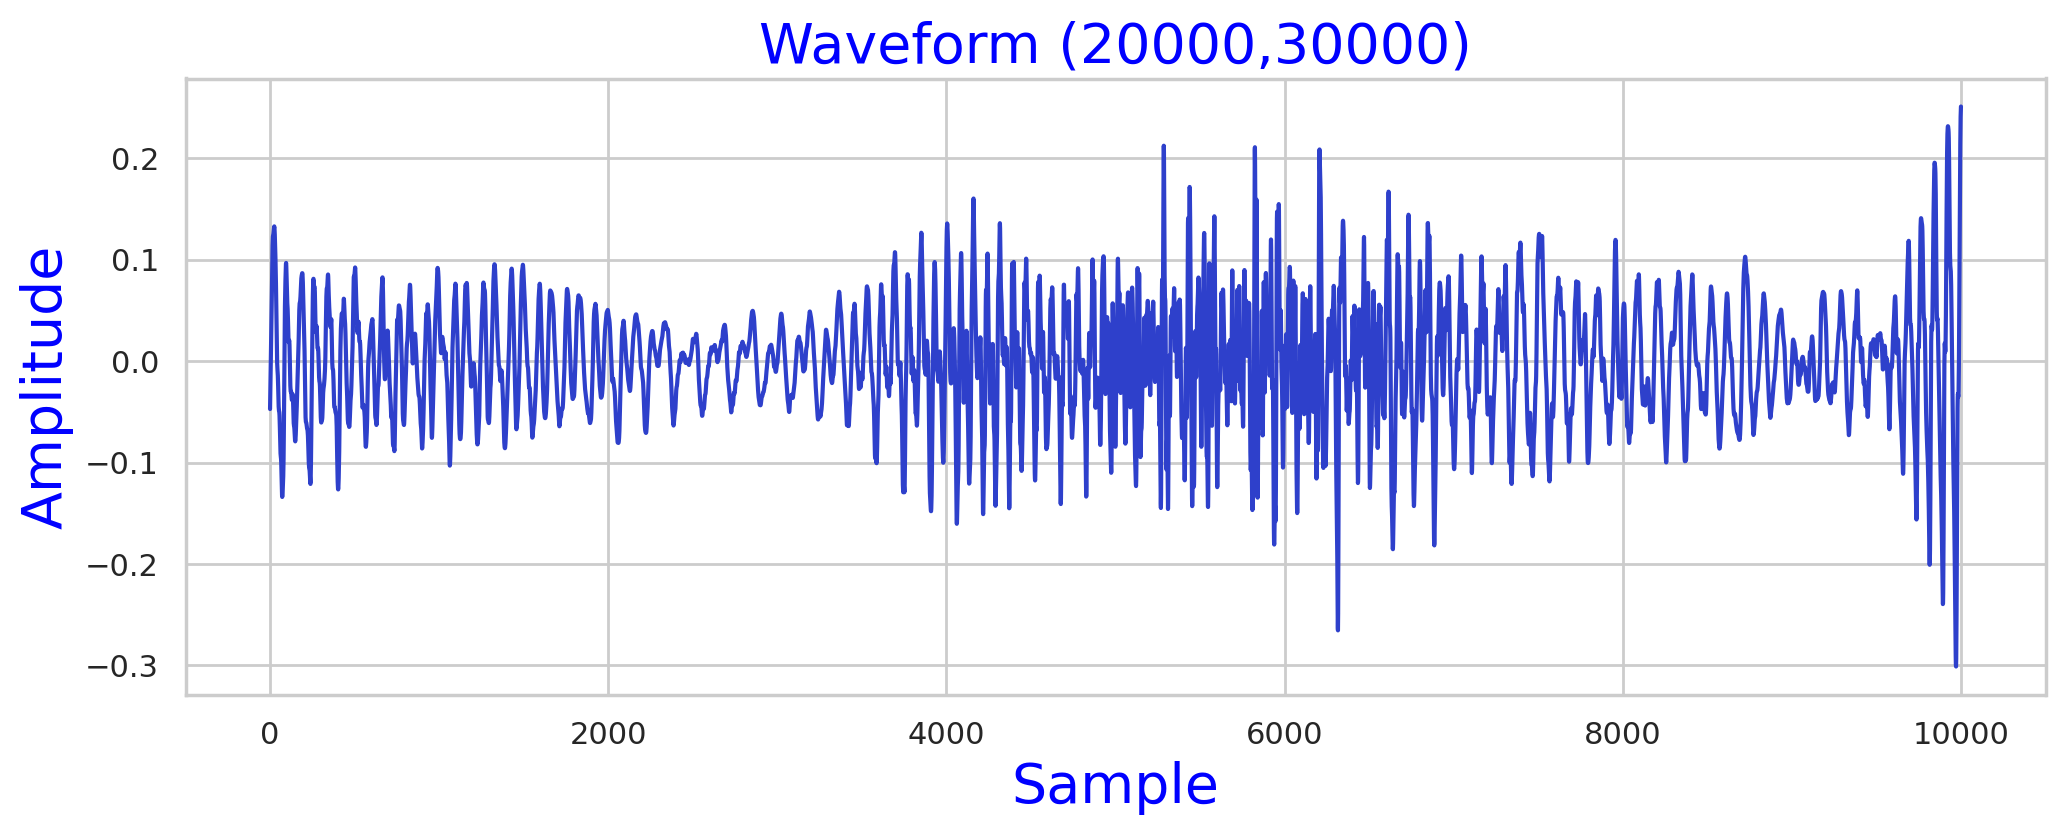

In [37]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000,30000)', fontdict= font2)
plt.show()

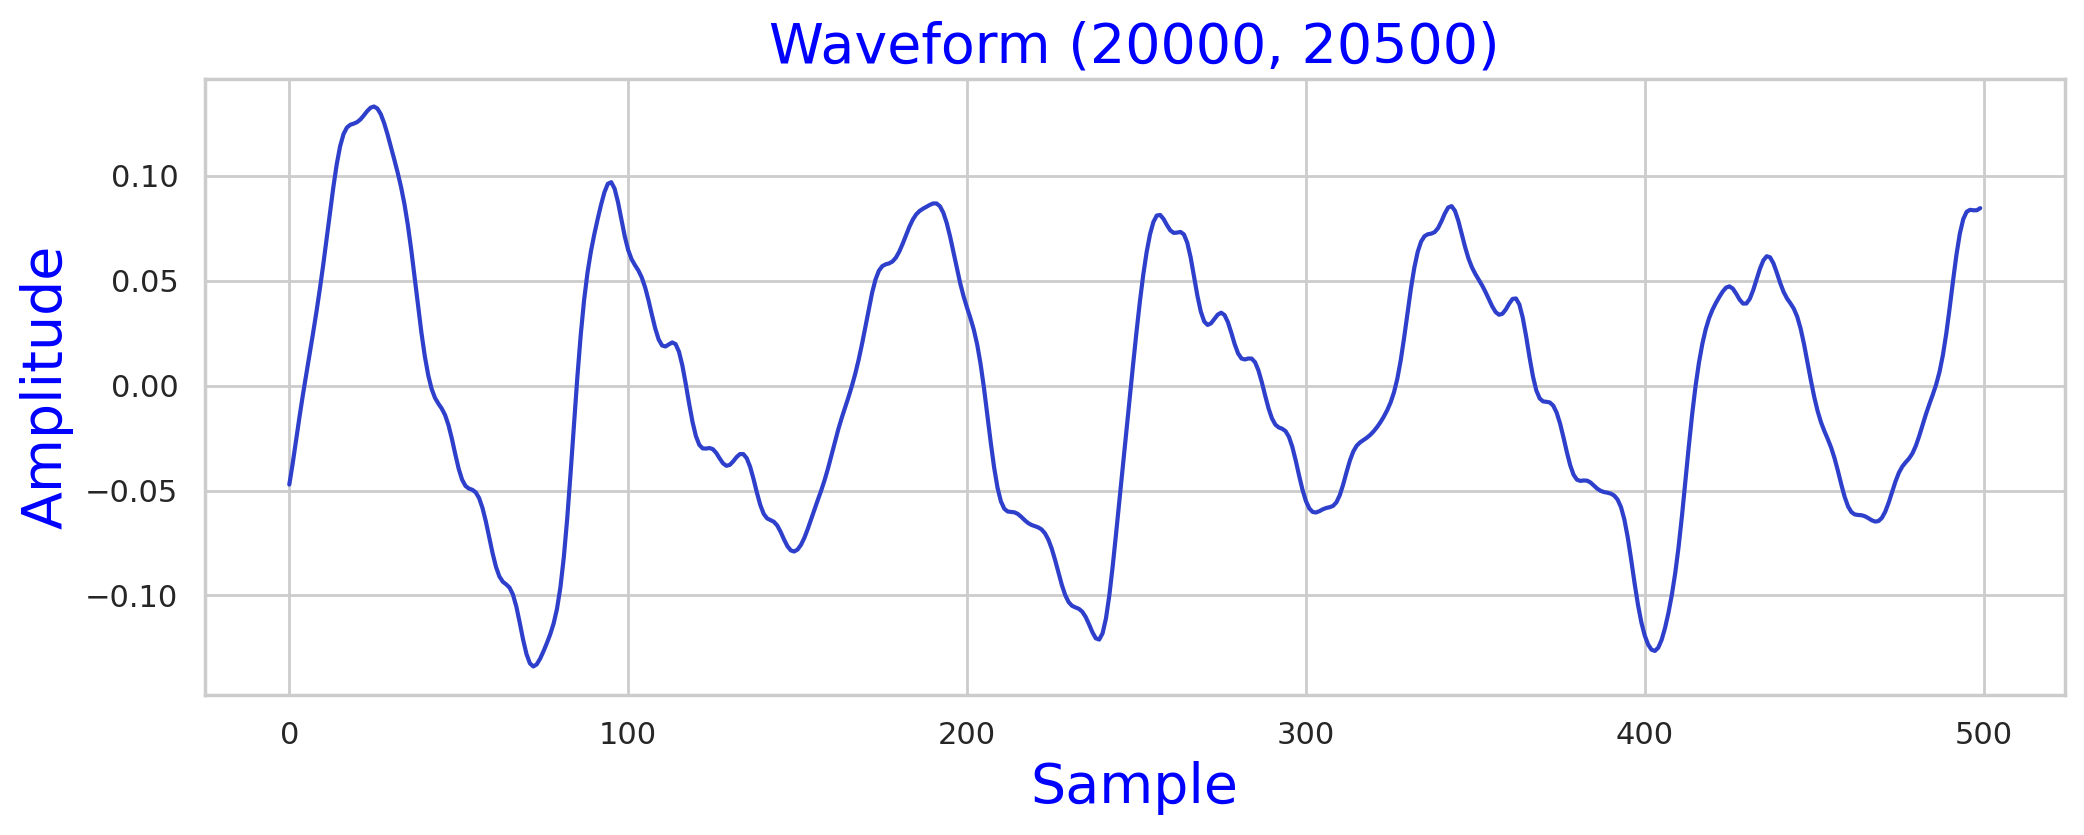

In [38]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (20000, 20500)', fontdict= font2)
plt.show()

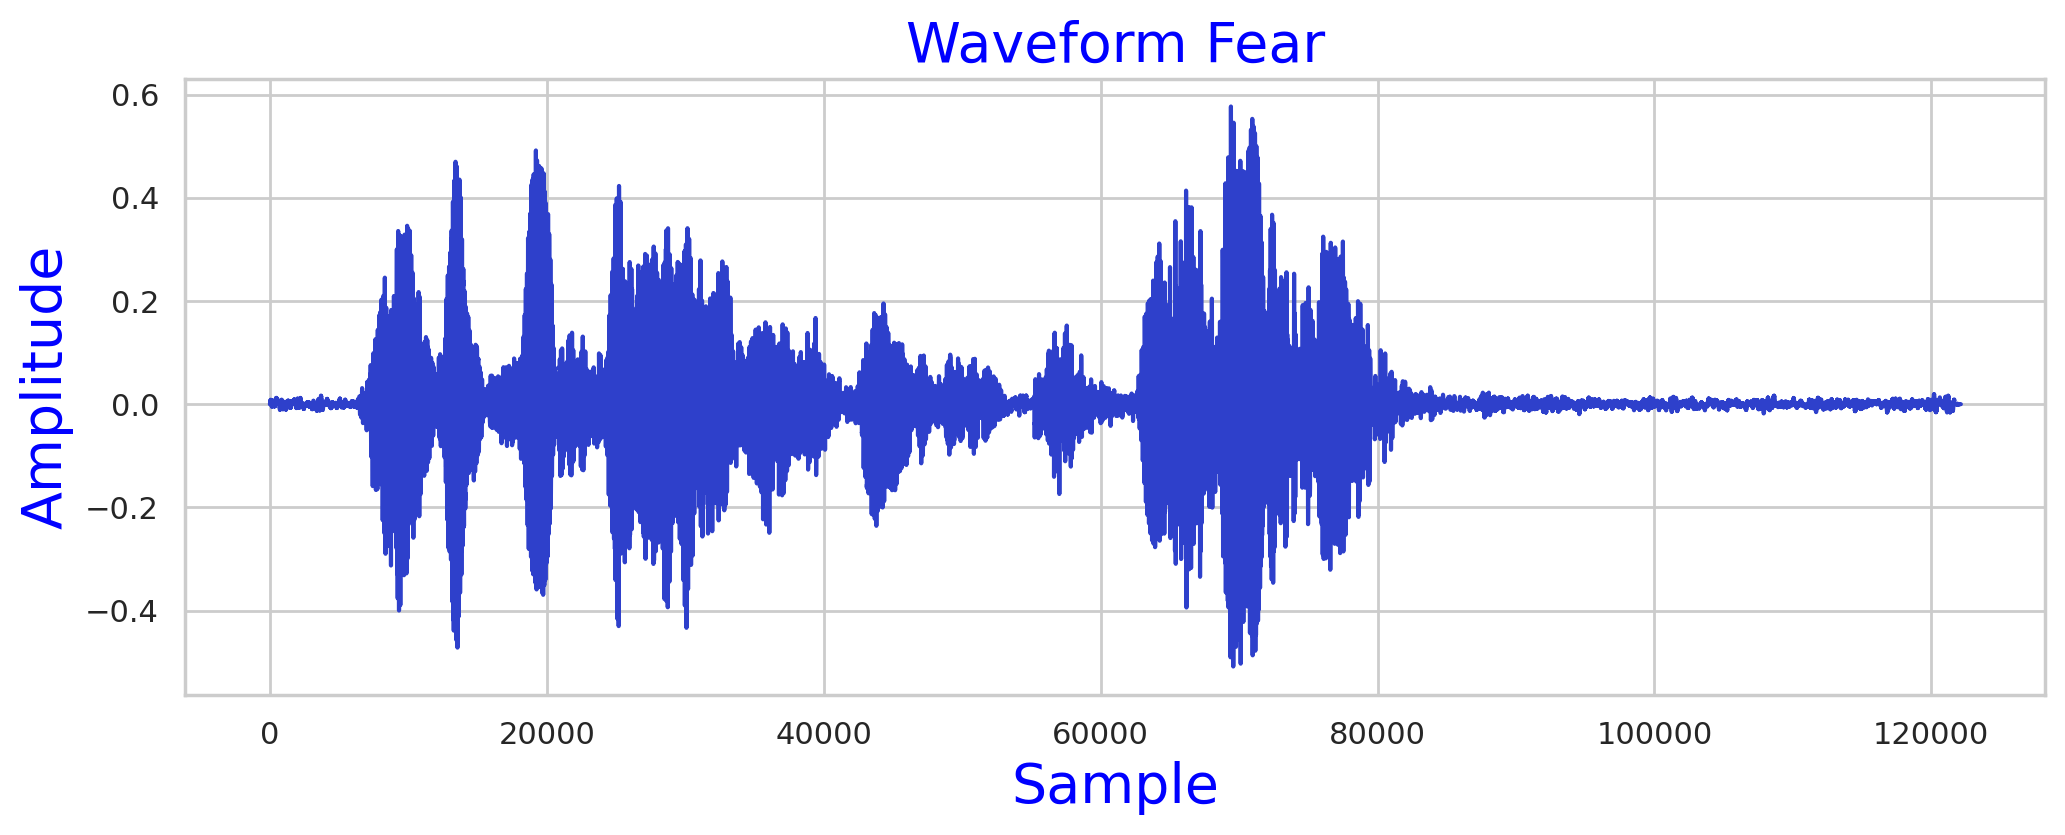

In [39]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Fear', fontdict= font2)
plt.show()

Audio(fear_sp.iloc[0])

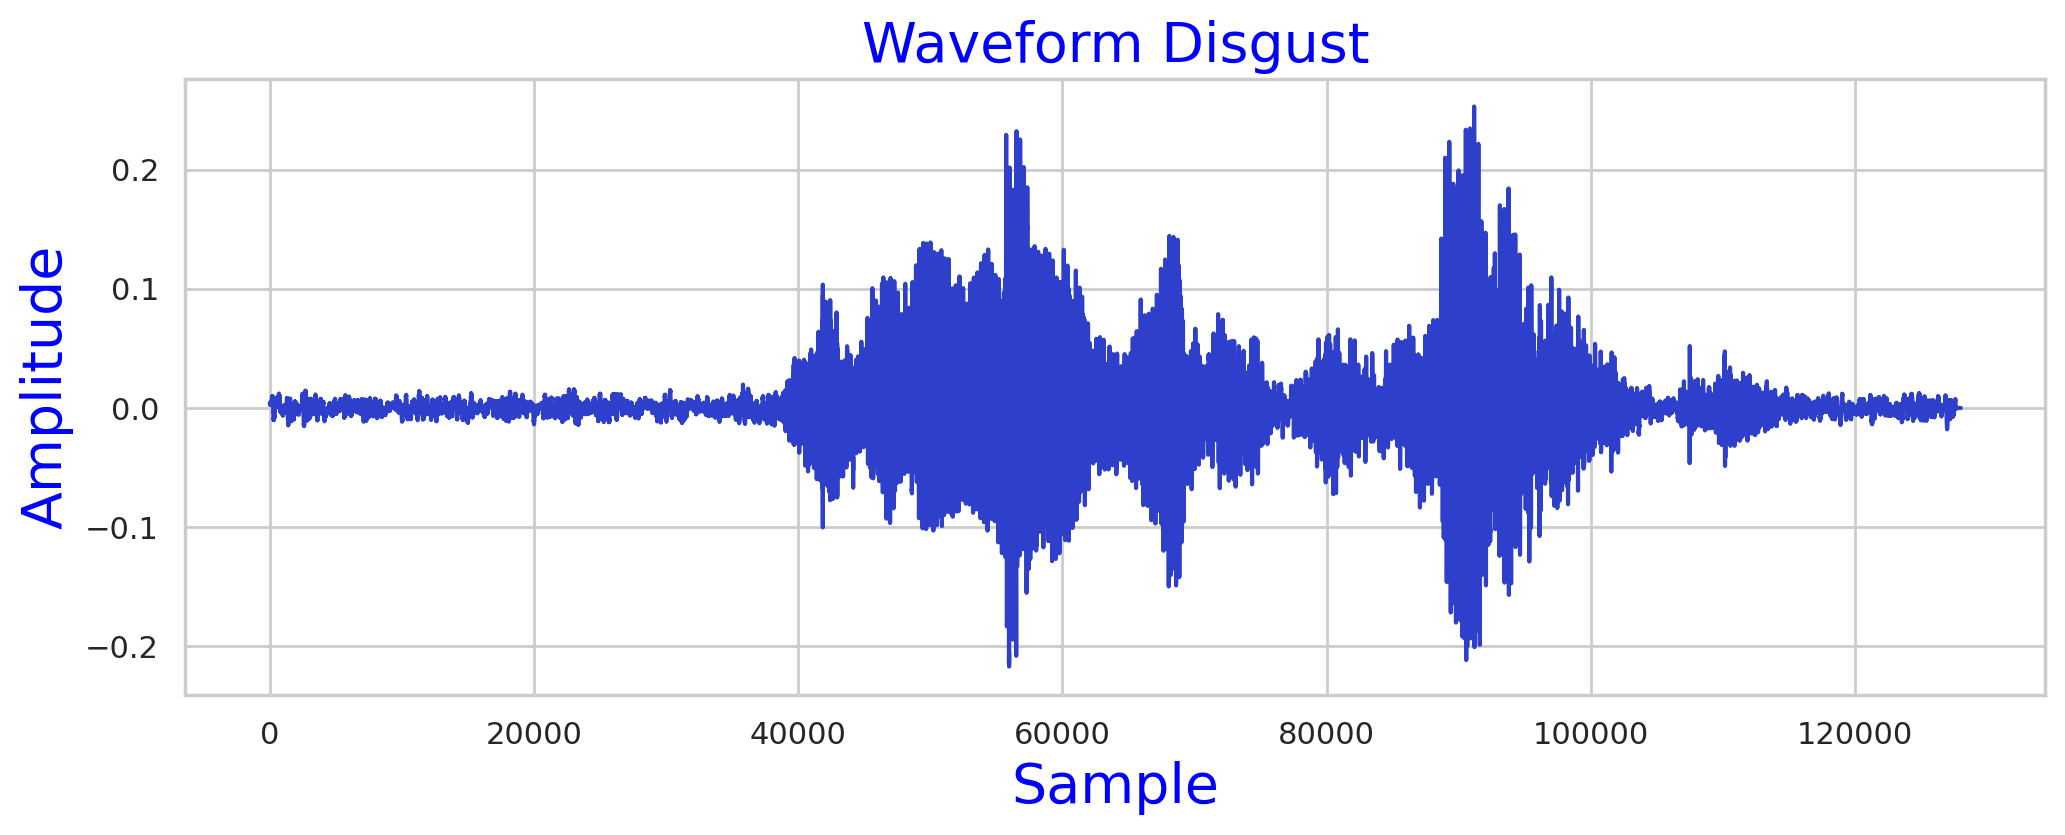

In [40]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Disgust', fontdict= font2)
plt.show()

Audio(disgust_sp.iloc[0])

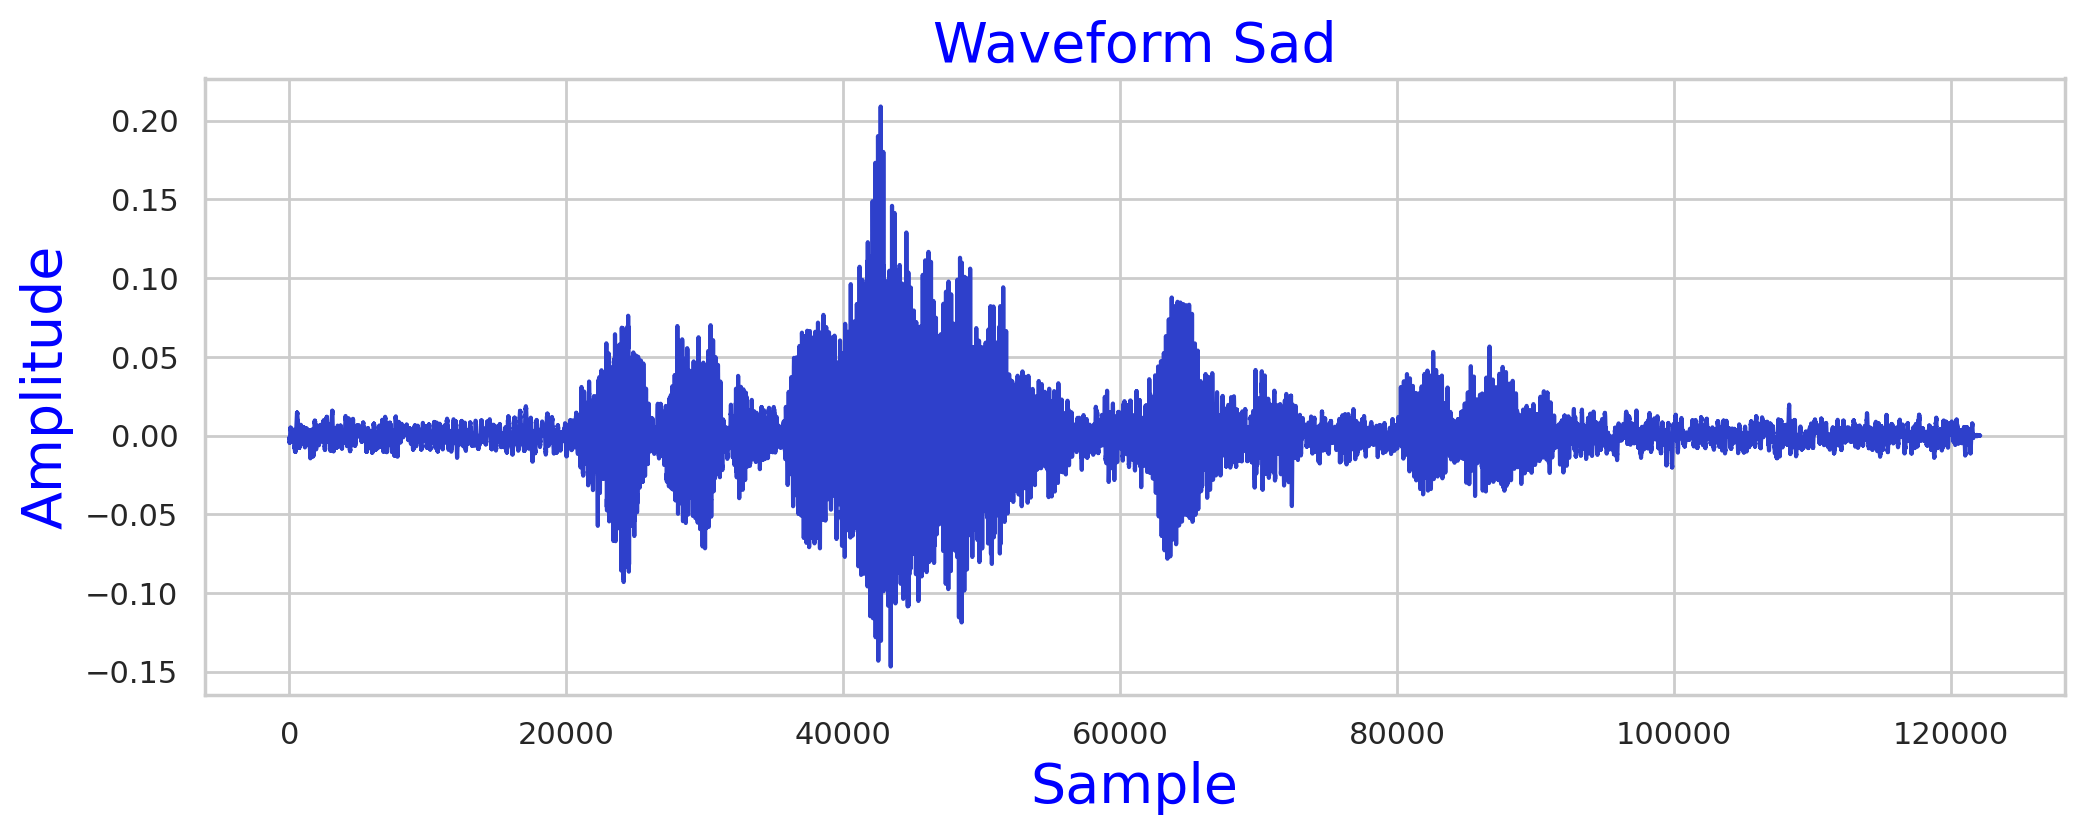

In [42]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Sad', fontdict= font2)
plt.show()

Audio(sad_sp.iloc[0])

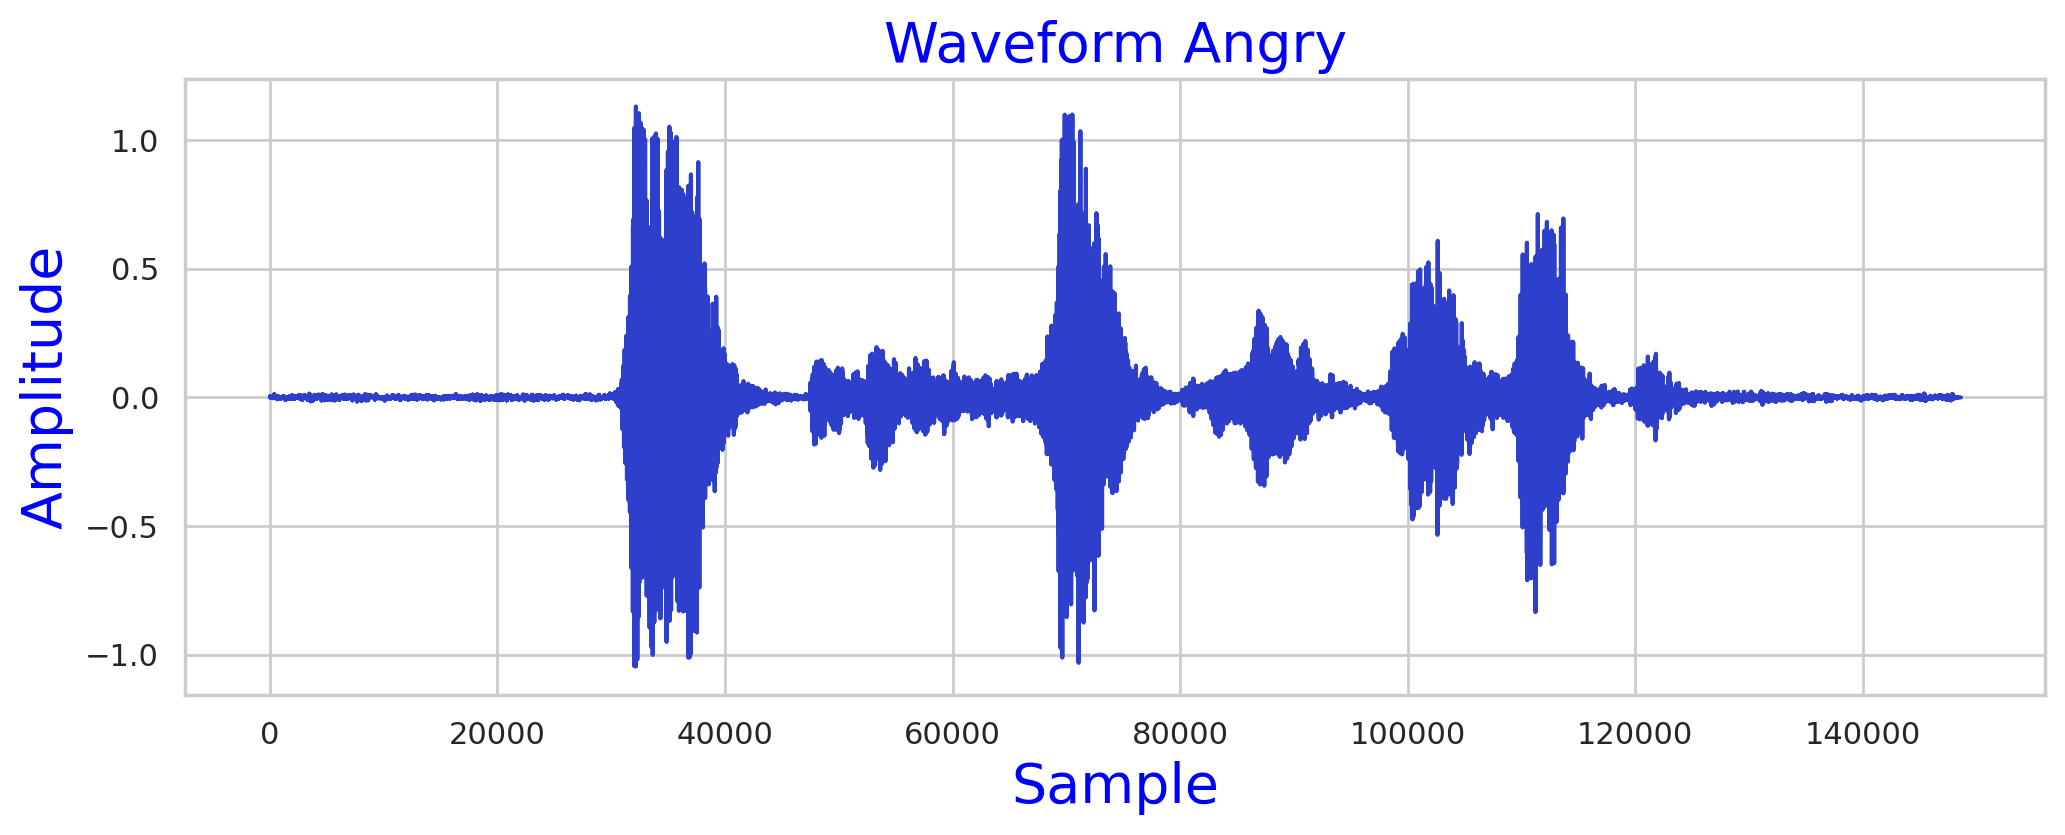

In [41]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Angry', fontdict= font2)
plt.show()

Audio(angry_sp.iloc[0])

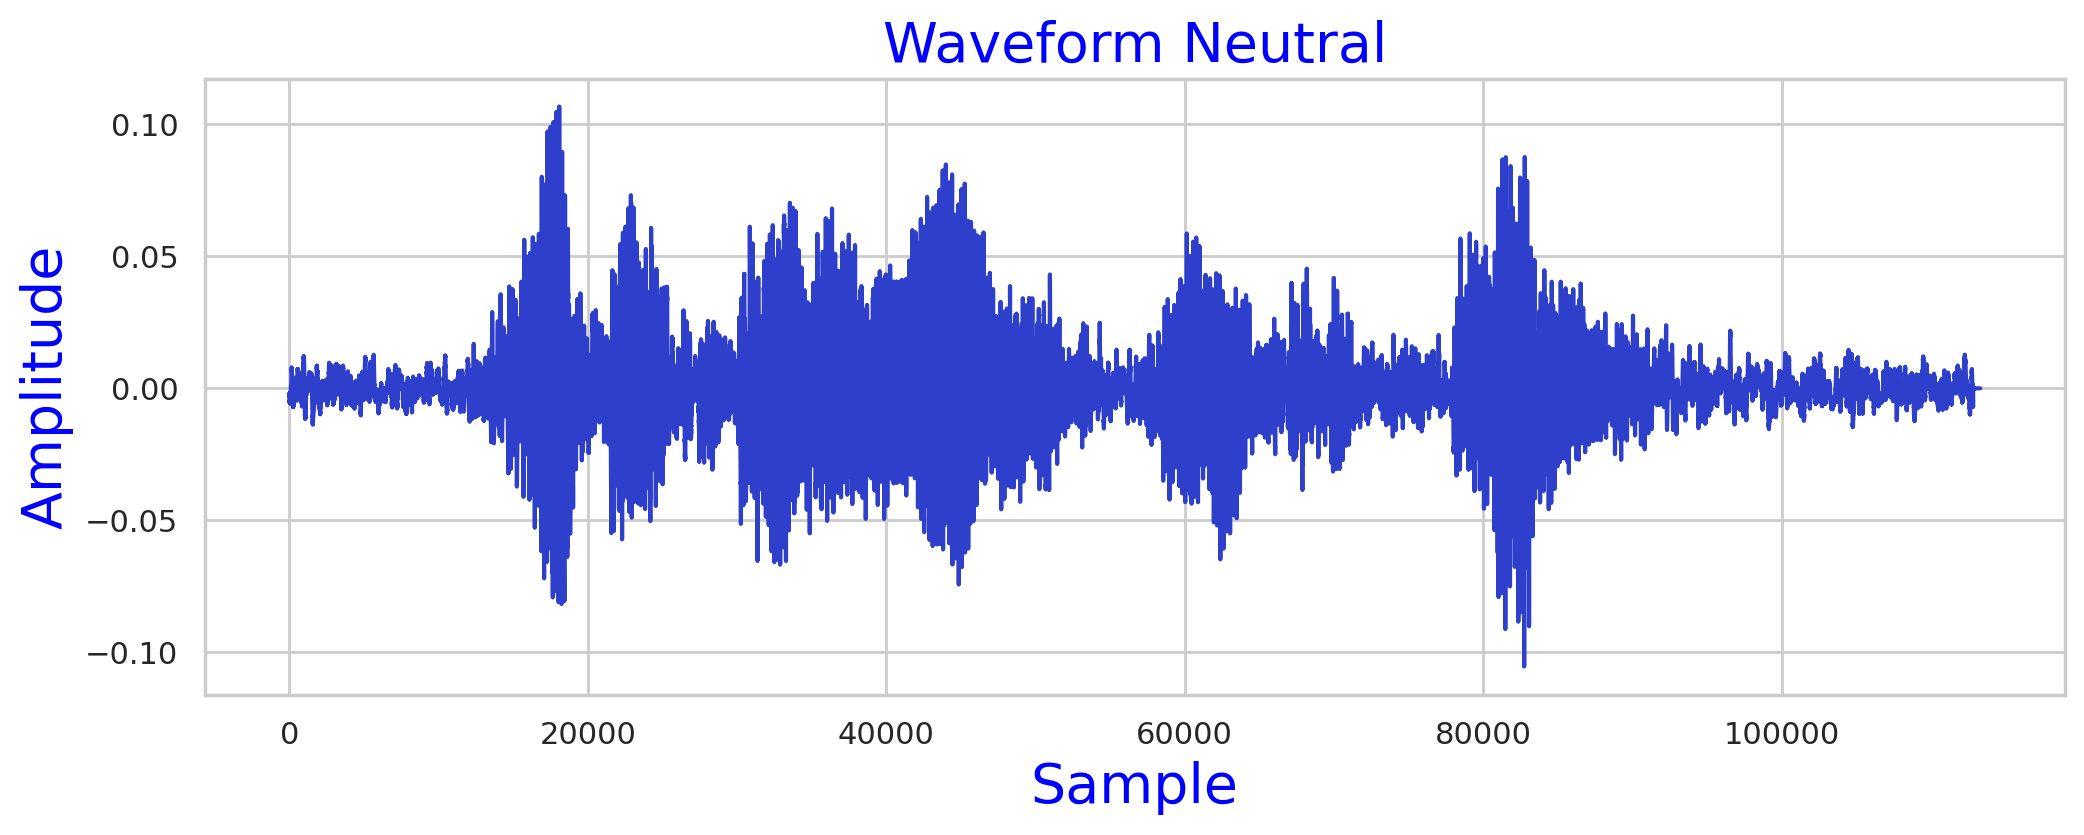

In [43]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Neutral', fontdict= font2)
plt.show()

Audio(neutral_sp.iloc[0])

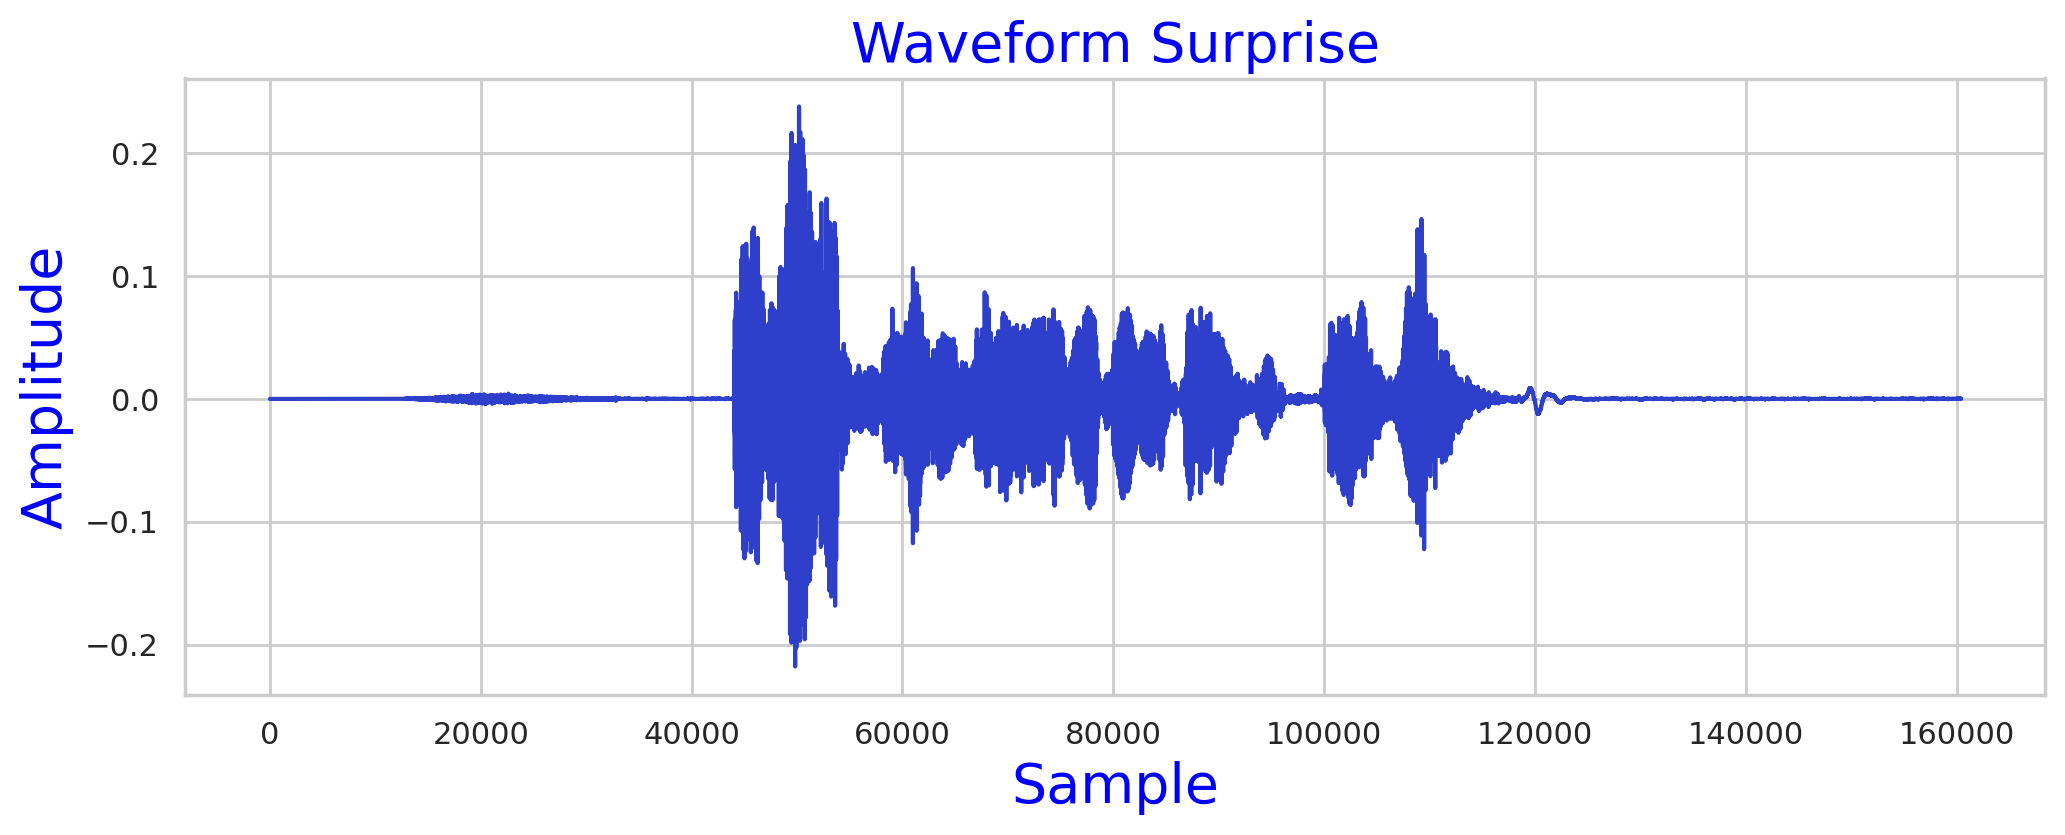

In [44]:
surprise_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform Surprise', fontdict= font2)
plt.show()

Audio(surprise_sp.iloc[0])

5- Amplitude Envelope

The amplitude envelope in speech recognition refers to the variation in signal intensity over time. It captures the envelope shape of the speech waveform, highlighting the rise and fall of energy during each syllable or phoneme. While spectral details provide information about individual speech sounds, the amplitude envelope is crucial when spectral resolution is limited.
In speech recognition, the sample duration refers to the time window over which audio data is analyzed. When capturing audio, you can specify a duration for recording or listening.

In [45]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [46]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.28 seconds


In [47]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []

    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)

    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):

    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [48]:
# Samples

Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [49]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))


239 251 291 196 222 314 239


In [50]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

239 251 291 196 222 314 239


In [51]:
(AE_fear == fancy_AE_fear).all()

np.True_

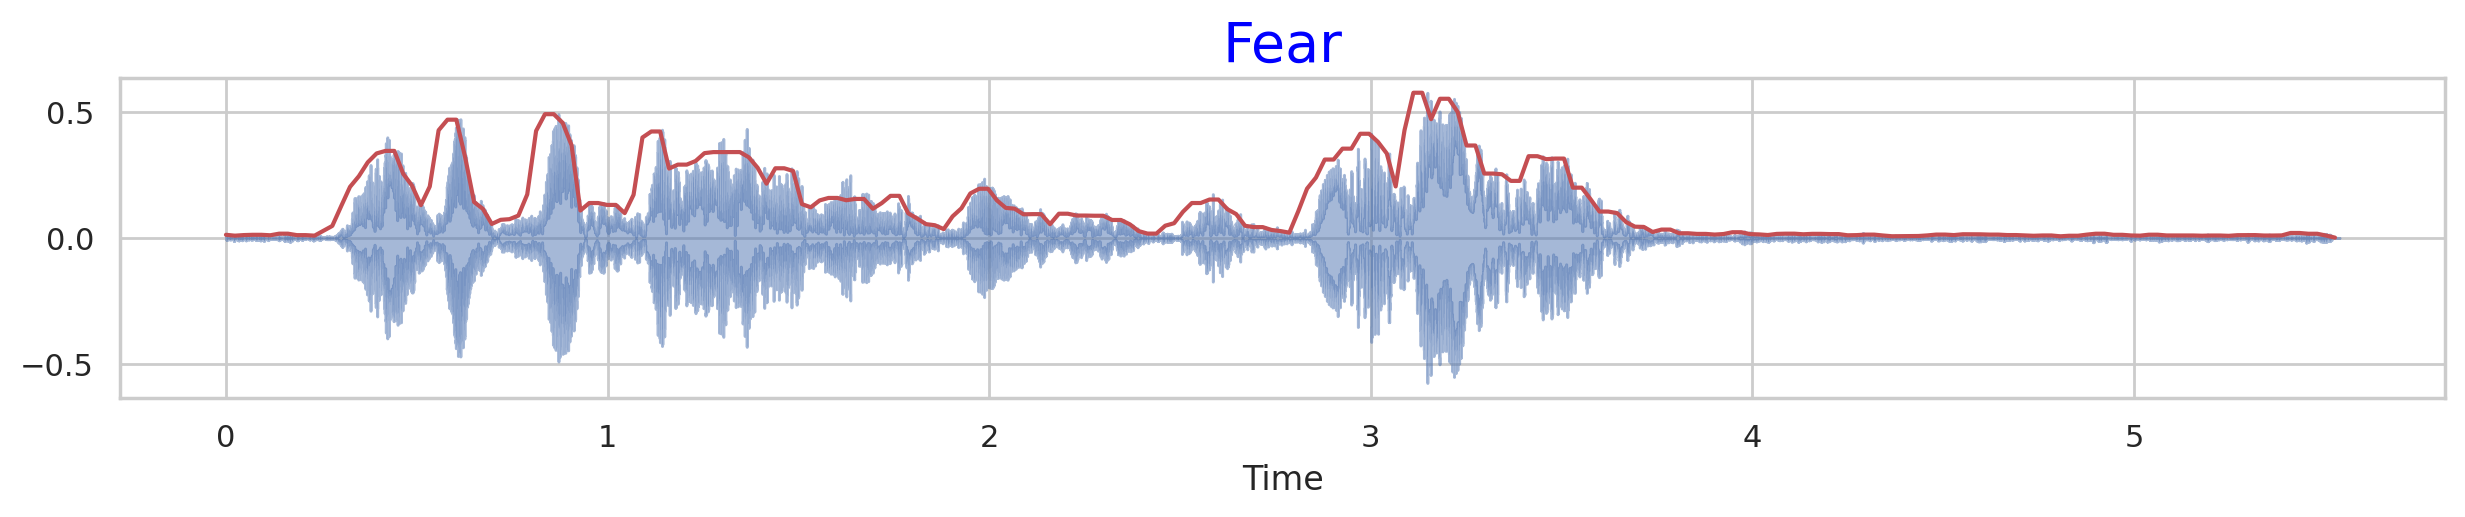

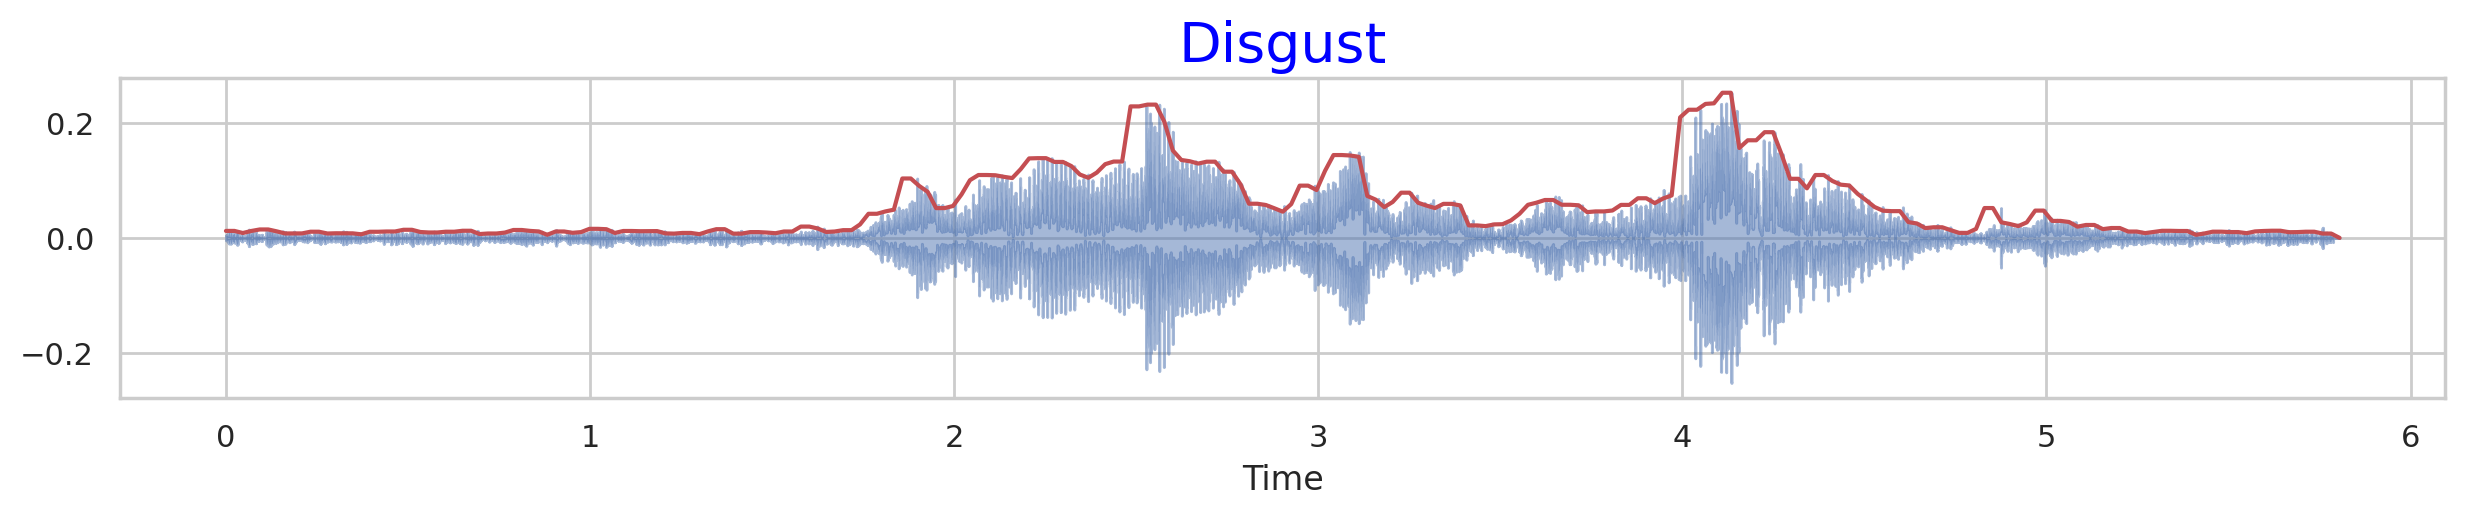

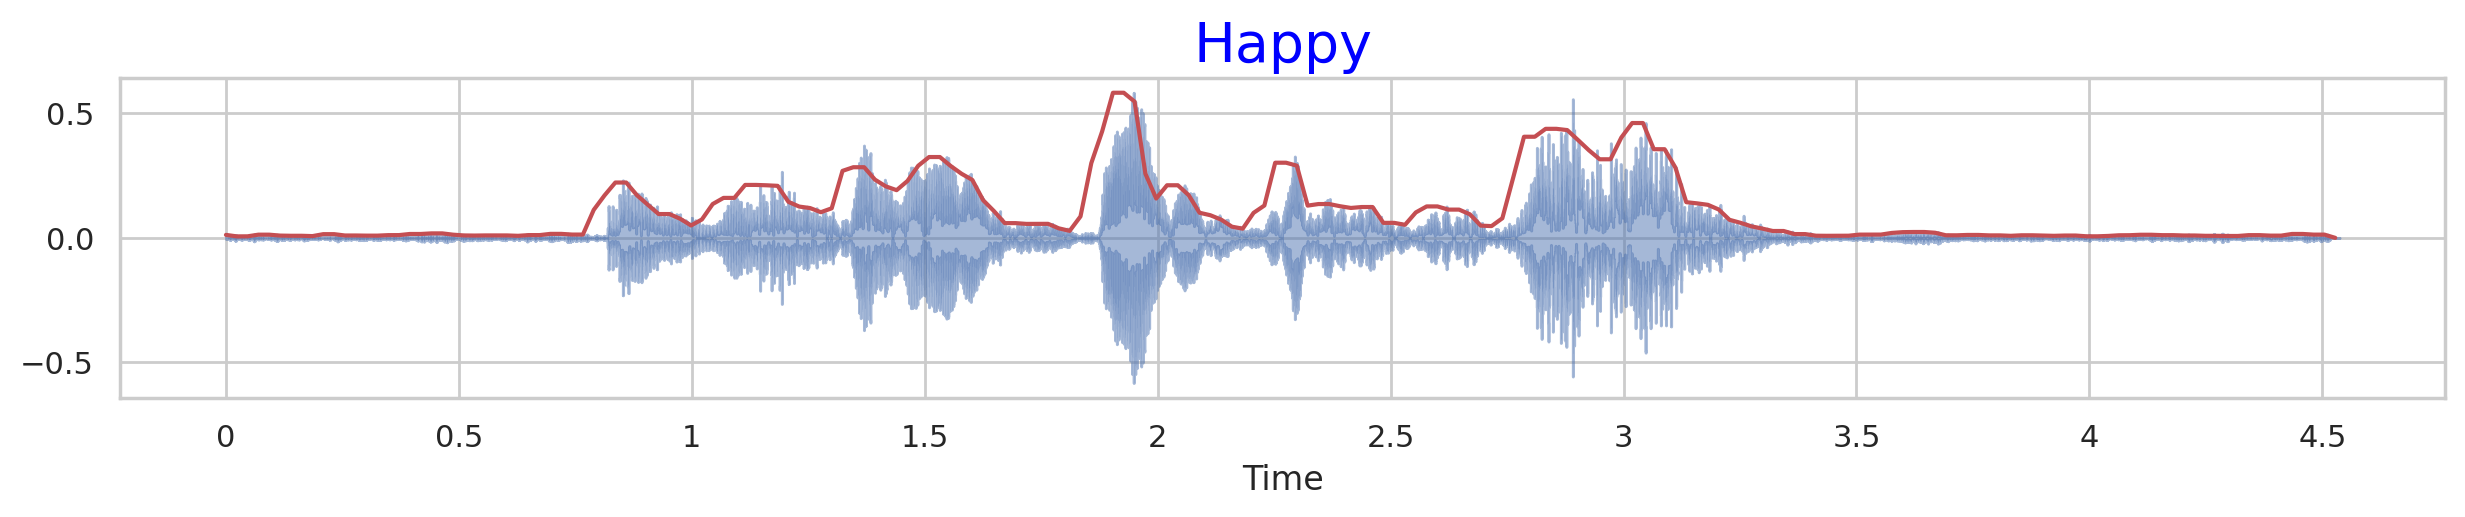

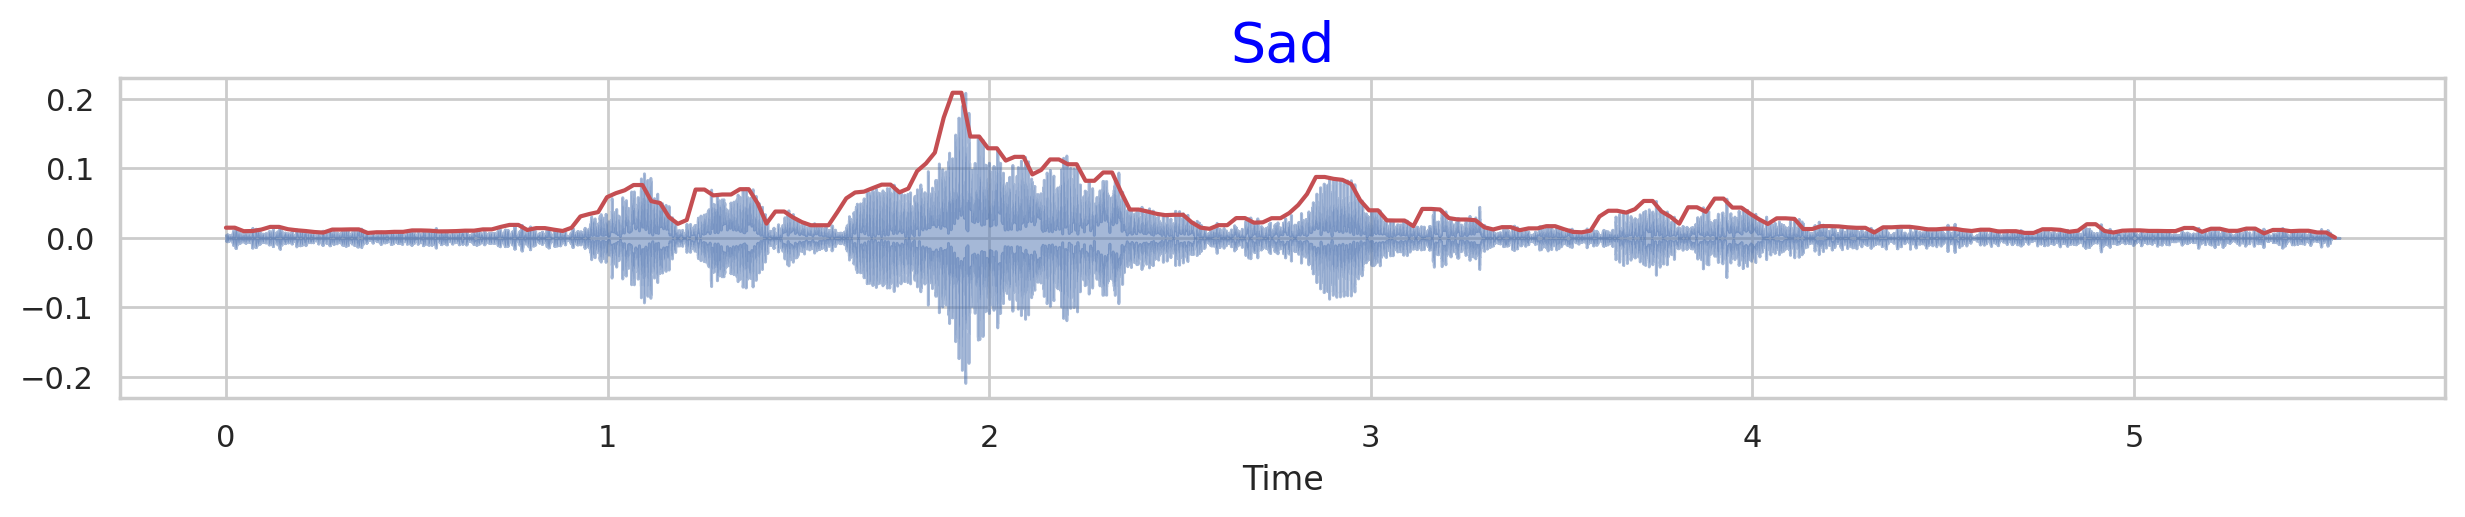

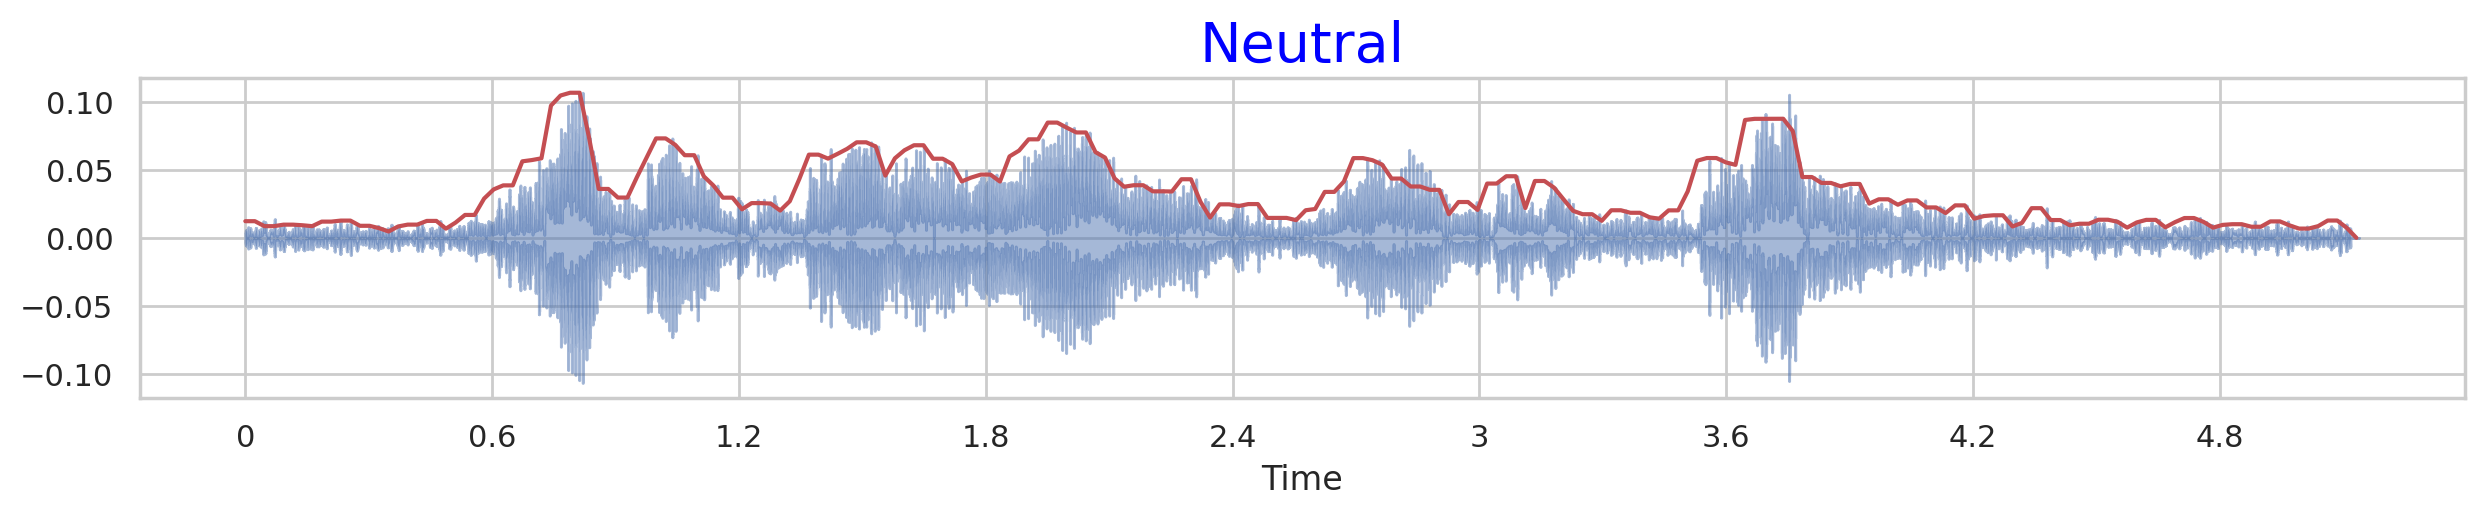

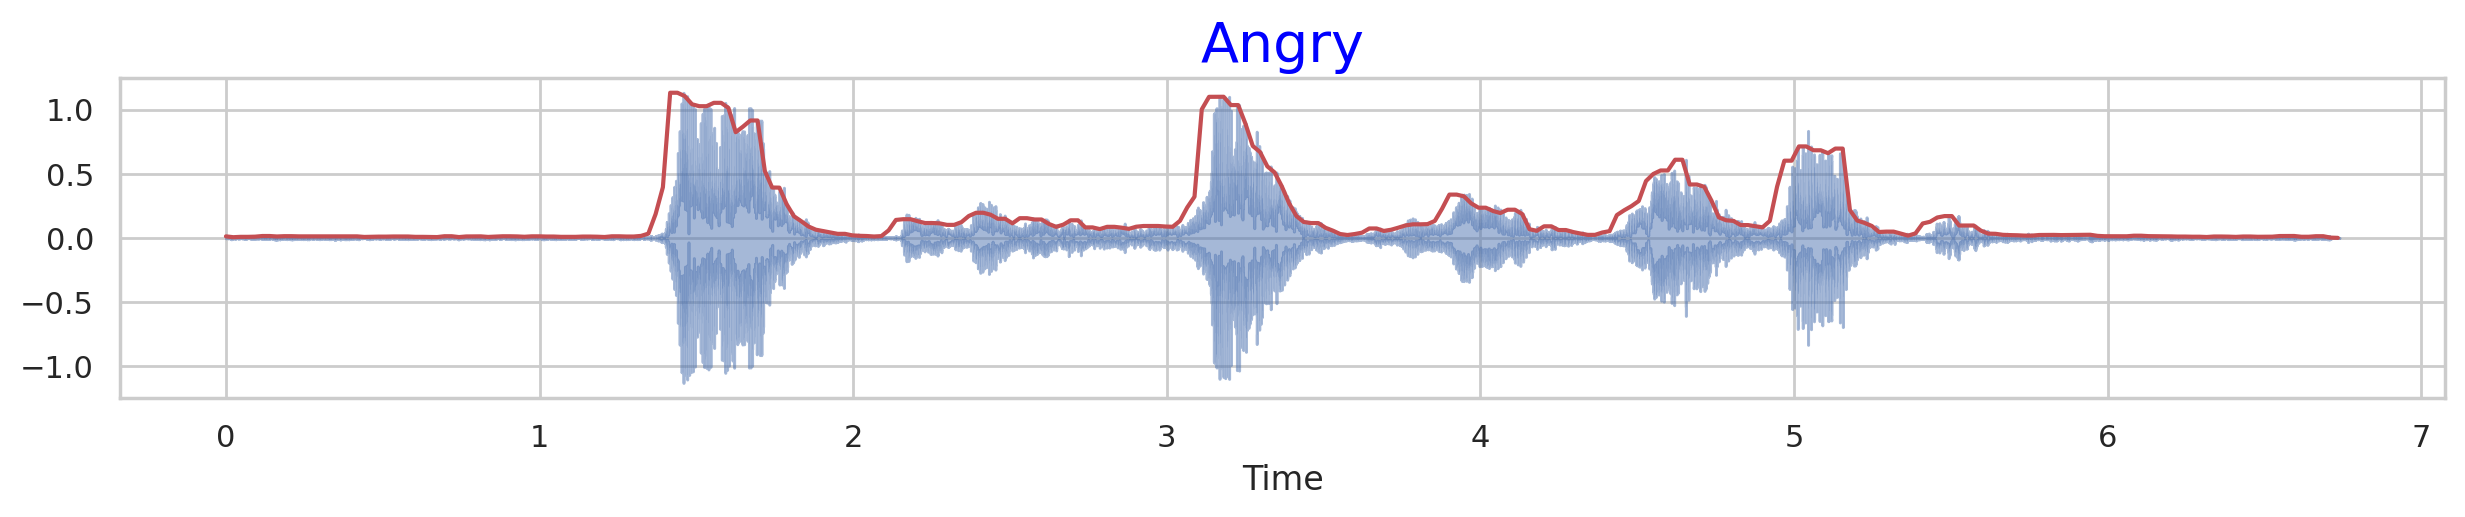

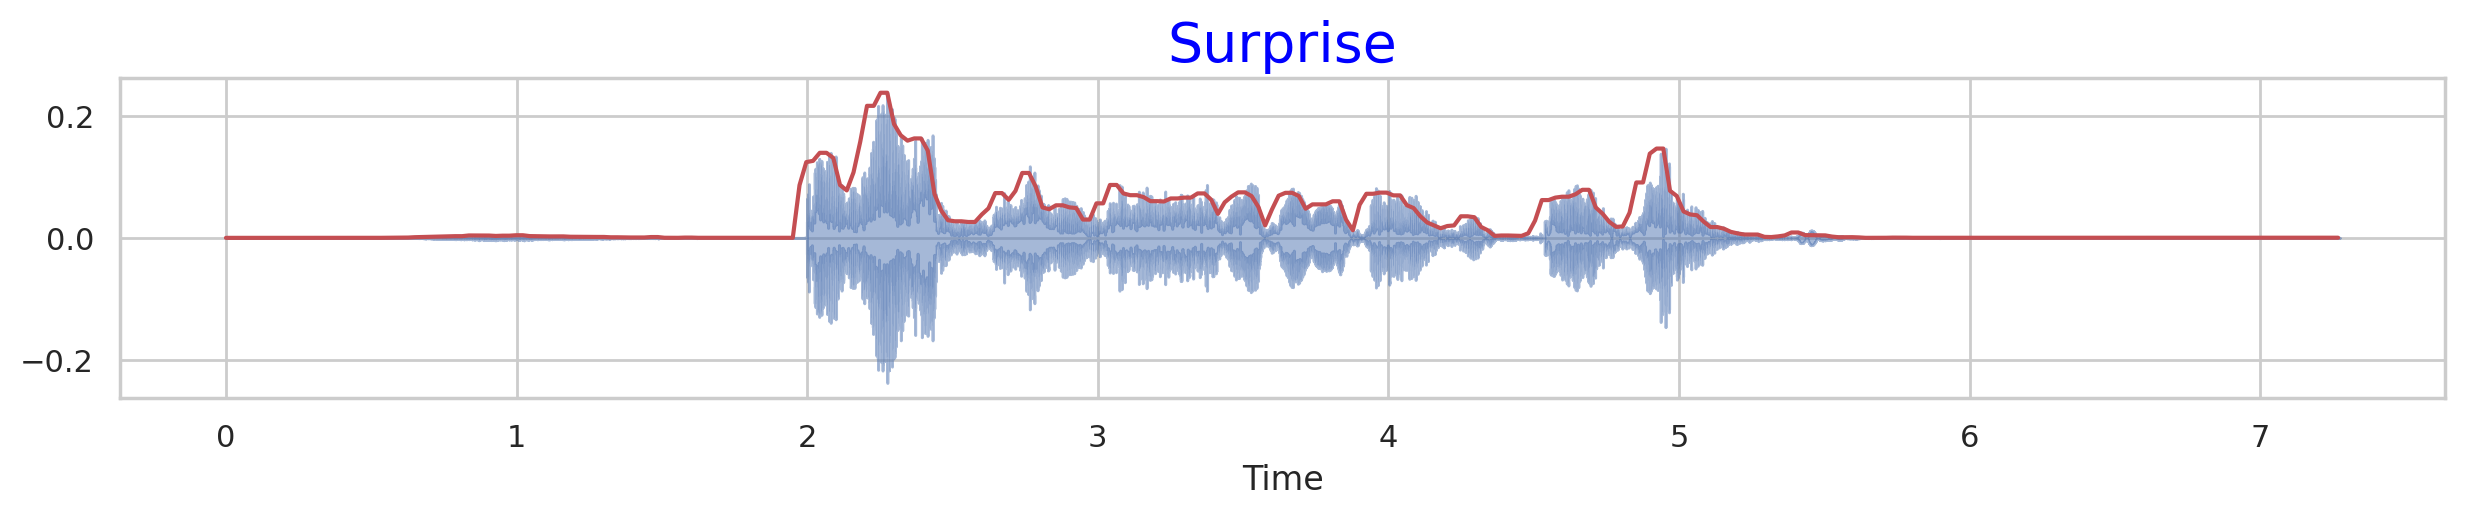

In [52]:
#Visualize amplitude envelope for all the audio files (Samples of each)

frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

6- Augmentasi (Noise, Stretch)

Data augmentation memainkan peran penting dalam meningkatkan kinerja model pengenalan ucapan. Mari kita eksplorasi dua teknik augmentasi audio yang umum digunakan: noise injection dan time stretching.

Noise Injection: Menambahkan noise ke dalam data audio membantu model menjadi lebih tahan terhadap variasi di dunia nyata.
Time Stretching: Time stretching mengubah durasi klip audio tanpa mengubah nadanya, memungkinkan model beradaptasi dengan kecepatan bicara yang berbeda.

In [53]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

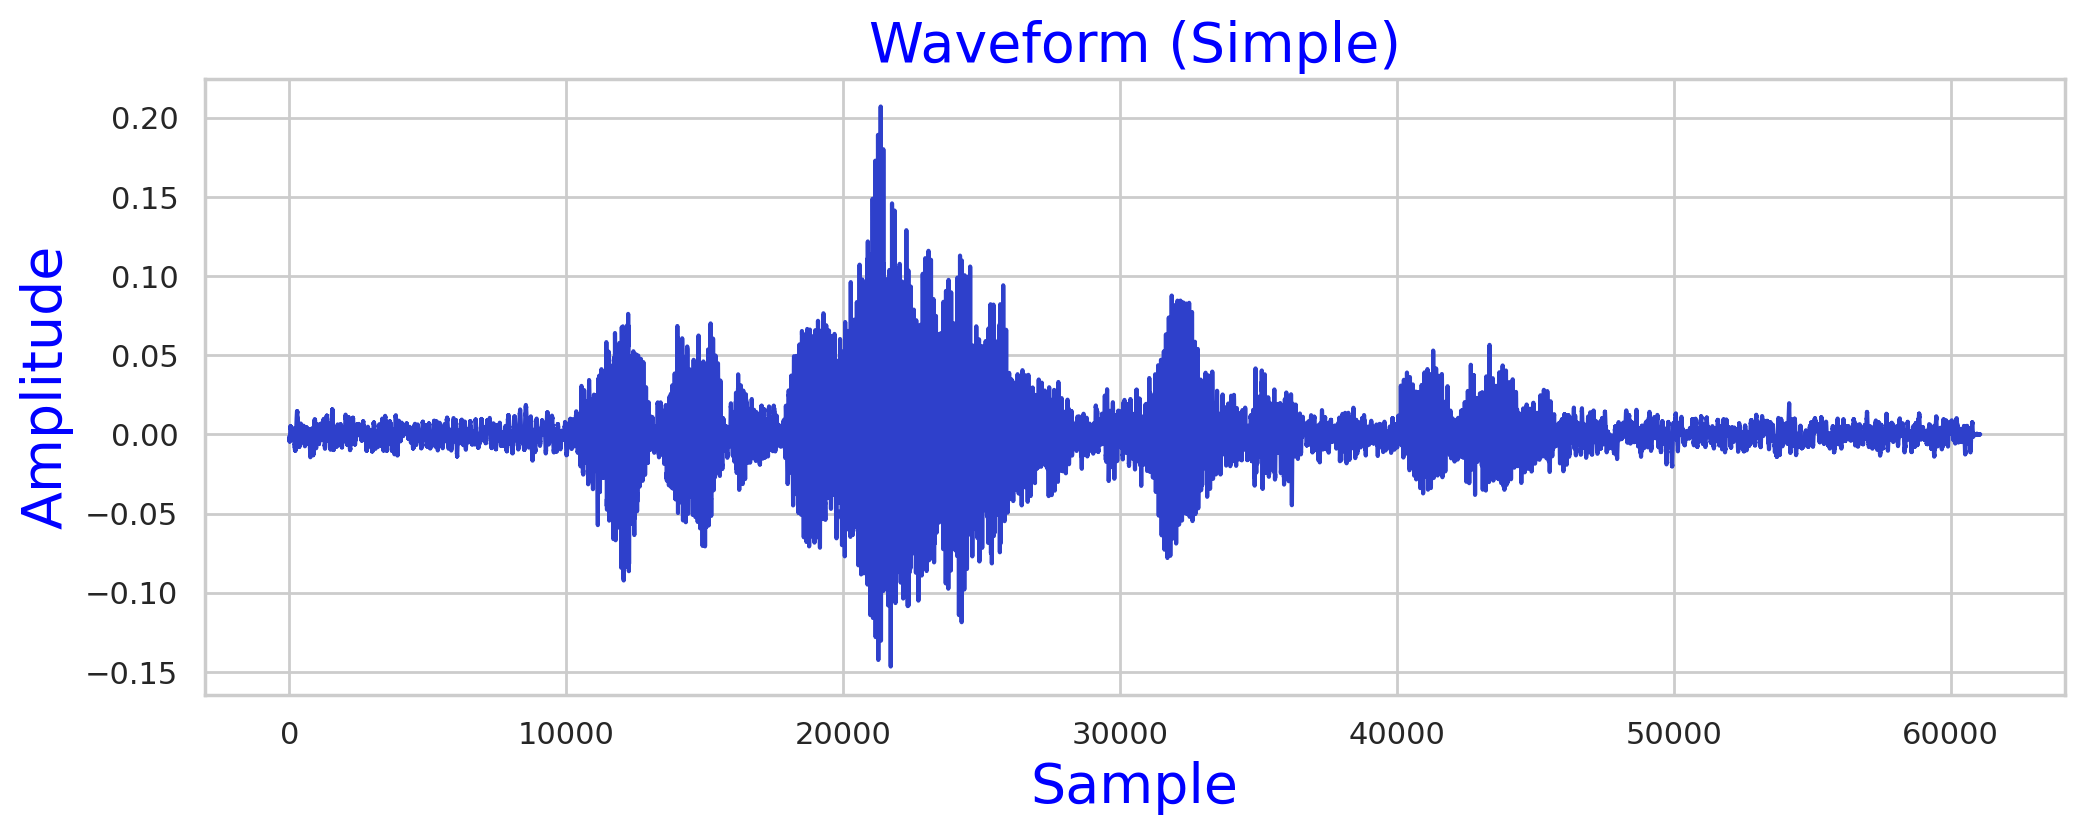

In [54]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Simple)', fontdict= font2)
plt.show()

Audio(Simple_data, rate=sample_rate)

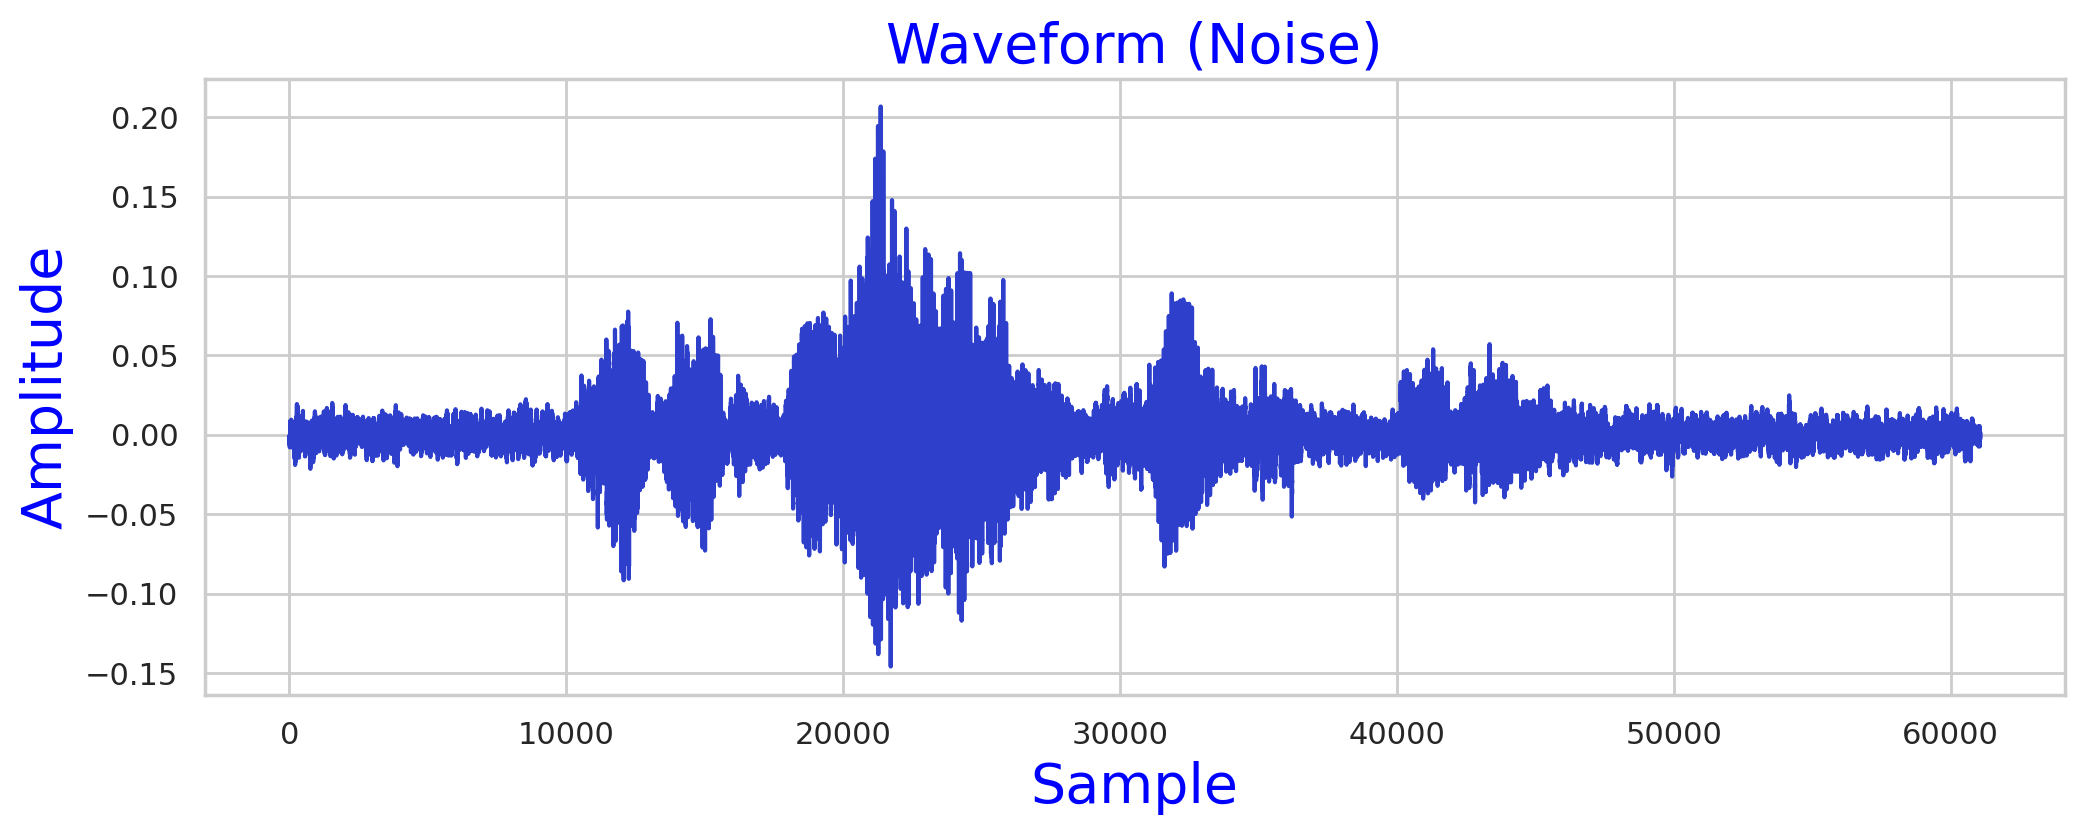

In [55]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Noise)', fontdict= font2)
plt.show()

Audio(Noise_data, rate=sample_rate)

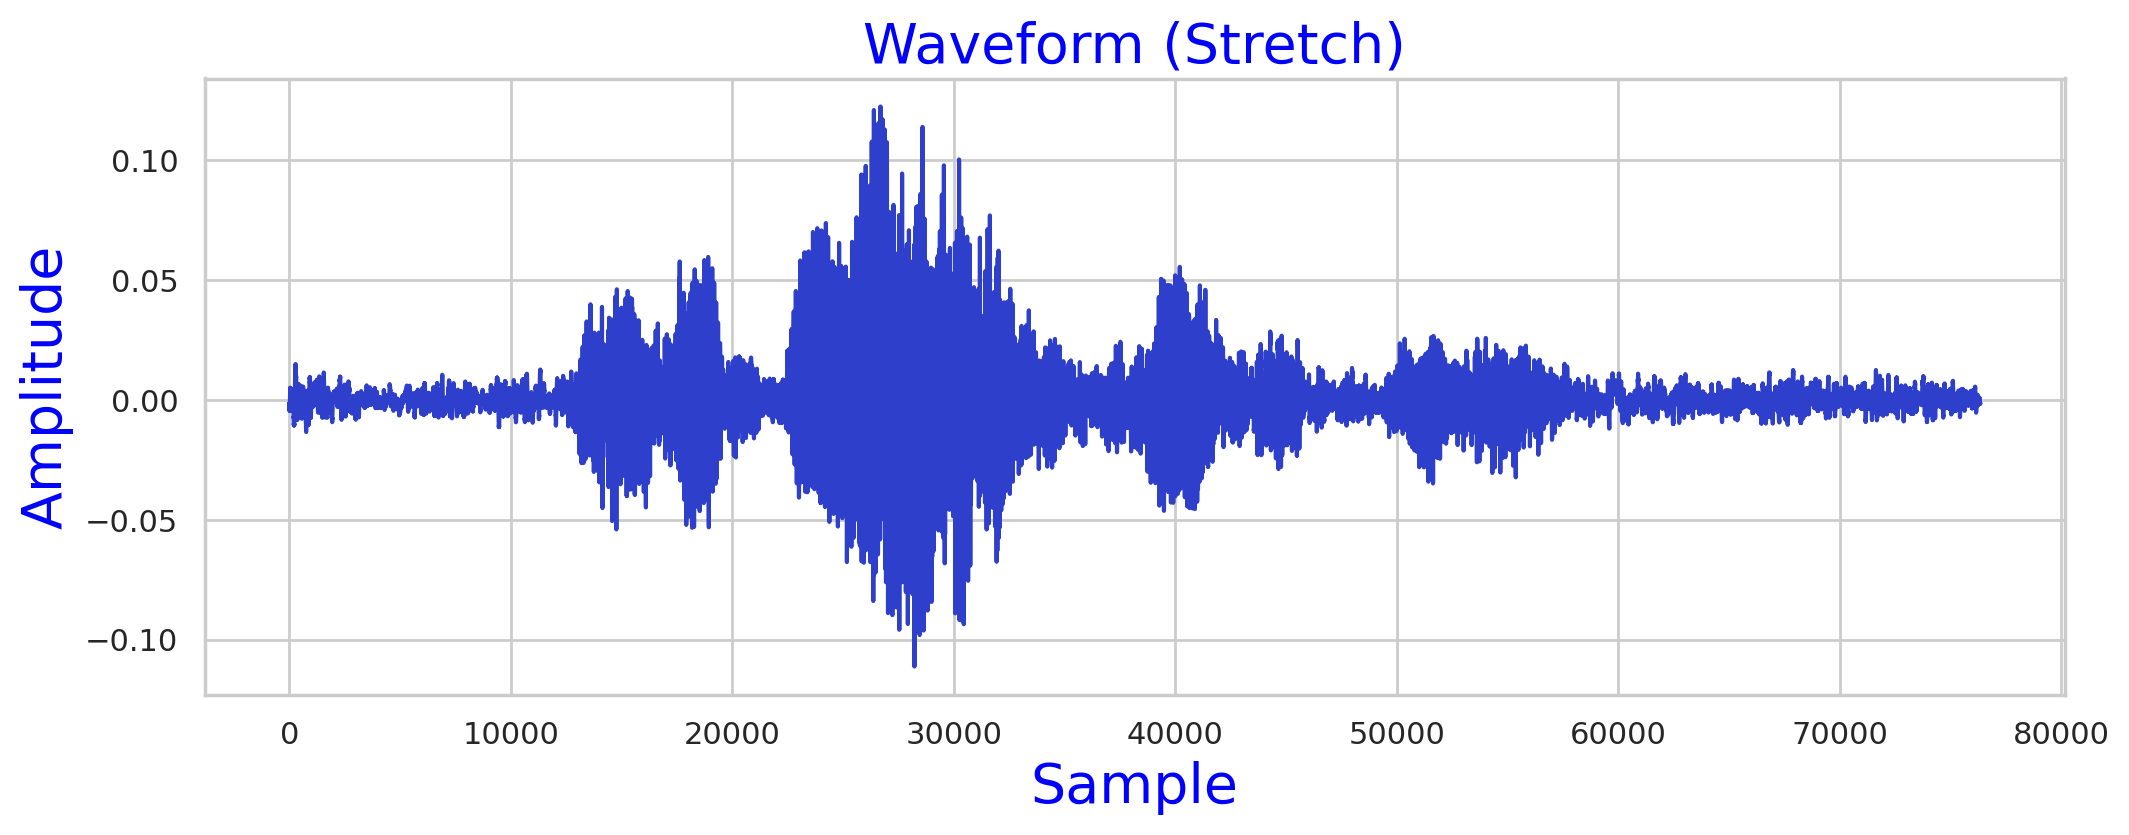

In [56]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample', fontdict= font2)
plt.ylabel('Amplitude', fontdict= font2)
plt.title('Waveform (Stretch)', fontdict= font2)
plt.show()

Audio(Stretch_data, rate=sample_rate)

Data PreParation

1- Only Crema

Dalam project ini saya hanya menggunakan crema.

In [57]:
Crema_df

Emotions                                               Path
0       happy  /content/drive/MyDrive/Pengenalan pola/archive...
1         sad  /content/drive/MyDrive/Pengenalan pola/archive...
2       angry  /content/drive/MyDrive/Pengenalan pola/archive...
3       happy  /content/drive/MyDrive/Pengenalan pola/archive...
4       angry  /content/drive/MyDrive/Pengenalan pola/archive...
...       ...                                                ...
7437     fear  /content/drive/MyDrive/Pengenalan pola/archive...
7438      sad  /content/drive/MyDrive/Pengenalan pola/archive...
7439     fear  /content/drive/MyDrive/Pengenalan pola/archive...
7440      sad  /content/drive/MyDrive/Pengenalan pola/archive...
7441    happy  /content/drive/MyDrive/Pengenalan pola/archive...

[7442 rows x 2 columns]

2- Ekstraksi MFCC

Mel-Frequency Cepstral Coefficients (MFCC) adalah teknik ekstraksi fitur yang banyak digunakan dalam pemrosesan ucapan dan audio.

In [58]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [59]:
extract_mfcc(Crema_df['Path'][0])

array([-3.0965485e+02,  1.1706489e+02, -1.4433178e+01,  3.2801861e+01,
       -1.0704514e+01,  7.5544982e+00, -1.0627209e+01, -1.2476921e+00,
       -1.0839429e+01,  1.8977456e-01, -5.3246946e+00,  6.1288196e-01,
        1.3893203e+01,  3.1928434e+00,  8.6375980e+00, -1.4201813e+01,
       -8.8491446e-01, -5.0549469e+00, -4.3835888e+00,  3.1885860e+00,
       -1.1378820e+01, -9.2018070e+00, -2.9892483e+00,  3.4573550e+00,
        2.3557708e+00,  4.9124556e+00,  2.8894939e+00,  1.1659554e+00,
       -4.8110852e+00, -1.1131607e+00,  3.8200104e+00,  1.8939909e-01,
        9.2447382e-01, -7.8745121e-01,  7.1772510e-01,  3.4896910e+00,
        5.8670554e+00,  2.7182765e+00,  1.2624019e+00, -1.2333267e+00],
      dtype=float32)